# XeF2 1 - 300eV Multi-orb processing
PH

- v2d 11/11/20

    - Added simulated branching ratios of various types.
    

- v2c 03/11/20

   - Added expt. branching ratios comparison (summed).


- v2b 27/10/20

  - Updating plot styles to HV.
  - Added branching ratios & more literature data.
  - Added ion yield data.


- v2 07/10/20 ([updated and distributed 26/10/20](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_ePS-expt_comp_131020_4d.html))

   - Running manually on Stimpy, ePSproc-v1.3-dev with multiJob class + RF updated experimental data analysis.
   - (See N2O preliminary data analysis for template, http://localhost:8888/lab/tree/dev/ePSproc/classDev/ePSproc_multijob_class_tests_N2O_011020_Stimpy.ipynb)


- v1 27/03/20

  - Running manually on AntonJr, ePSprc-v1.2 env.
  - Code adapted from recent multi-E chuncked job notebooks.

For [previous XeF2 processing, see here](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_multi-orb_comparisons_270320-dist.html).

## Setup

In [1]:
!hostname

Stimpy


In [2]:
!conda env list

# conda environments:
#
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D-yt
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSpkgTest2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\fibre-sim
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ipykernel_py2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pkgTest
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pypi-test
                        

In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

import matplotlib.pyplot as plt

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
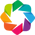

In [5]:
hvPlotters.setPlotters(width = 700)
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

## Load data

In [6]:
# # Scan for subdirs, based on existing routine in getFiles()

fileBase = r'D:\projects\ePolyScat\xef2\XeF2_highRes_wf'  # Data dir on Stimpy


In [7]:
data = ePSmultiJob(fileBase, verbose = 0)

In [8]:
keys = [4,5,6]  # Set for 4d data only
data.scanFiles(keys = keys)
data.jobsSummary()

Found 3 directories, with 80 files.

*** Job orb21 details
Key: orb21
Dir D:\projects\ePolyScat\xef2\XeF2_highRes_wf\orb21_A1G, 30 files.
{   'batch': 'ePS XeF2_2020, batch XeF2_highRes_wf, orbital orb21_A1G',
    'event': 'orb 21 ionization (Xe 4d, A1G/SG), sph grid. Inputs based on '
             'original 2019 calcs, now with chunking for higher E resolution.',
    'orbE': -76.581003676086,
    'orbLabel': 'Xe 4d, A1G/SG'}

*** Job orb22 details
Key: orb22
Dir D:\projects\ePolyScat\xef2\XeF2_highRes_wf\orb22_E1G, 30 files.
{   'batch': 'ePS XeF2_2020, batch XeF2_highRes_wf, orbital orb22_E1G',
    'event': 'orb 22/23 ionization (Xe 4d, E1G/PG), sph grid. Inputs based on '
             'original 2019 calcs, now with chunking for higher E resolution.',
    'orbE': -76.27895729126399,
    'orbLabel': 'Xe 4d, E1G/PG'}

*** Job orb24 details
Key: orb24
Dir D:\projects\ePolyScat\xef2\XeF2_highRes_wf\orb24_E2G, 20 files.
{   'batch': 'ePS XeF2_2020, batch XeF2_highRes_wf, orbital orb24_E2G

## System properties


*** Molecular structure


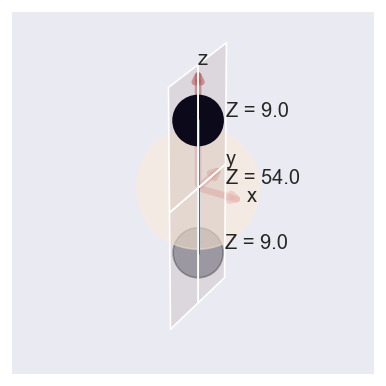


*** Molecular orbital list (from ePS output file)
EH = Energy (Hartrees), E = Energy (eV), NOrbGrp, OrbGrp, GrpDegen = degeneracies and corresponding orbital numbering by group in ePS, NormInt = single centre expansion convergence (should be ~1.0).


props Sym         EH  Occ             E  NOrbGrp  OrbGrp  GrpDegen   NormInt
orb                                                                         
1      SG -1276.2548  2.0 -34728.662023      1.0     1.0       1.0  1.000000
2      SG  -202.4761  2.0  -5509.655317      1.0     2.0       1.0  1.000001
3      SU  -181.5792  2.0  -4941.021704      1.0     3.0       1.0  1.000000
4      PU  -181.5770  2.0  -4940.961839      1.0     4.0       2.0  1.000000
5      PU  -181.5770  2.0  -4940.961839      2.0     4.0       2.0  1.000000
6      SG   -43.1198  2.0  -1173.349523      1.0     5.0       1.0  1.000001
7      SU   -36.1973  2.0   -984.978703      1.0     6.0       1.0  1.000000
8      PU   -36.1881  2.0   -984.728358      1.0     7.0       2.0  1.000001
9      PU   -36.1881  2.0   -984.728358      2.0     7.0       2.0  1.000001
10     SG   -26.3038  2.0   -715.762856      1.0     8.0       1.0  0.819982
11     SU   -26.3038  2.0   -715.762856      1.0     9.0       1.0  0.805992
12     SG   -25.8711  2.0   -703.988489      1.0    10.0       1.0  1.000000
13     PG   -25.8673  2.0   -703.885086      1.0    11.0       2.0  1.000001
14     PG   -25.8673  2.0   -703.885086      2.0    11.0       2.0  1.000001
15     DG   -25.8578  2.0   -703.626577      1.0    12.0       2.0  1.000000
16     DG   -25.8578  2.0   -703.626577      2.0    12.0       2.0  1.000000
17     SG    -8.5562  2.0   -232.826061      1.0    13.0       1.0  0.999998
18     SU    -6.2727  2.0   -170.688861      1.0    14.0       1.0  1.000000
19     PU    -6.2547  2.0   -170.199056      1.0    15.0       2.0  0.999999
20     PU    -6.2547  2.0   -170.199056      2.0    15.0       2.0  0.999999
21     SG    -2.8143  2.0    -76.581004      1.0    16.0       1.0  0.999993
22     PG    -2.8032  2.0    -76.278957      1.0    17.0       2.0  1.000000
23     PG    -2.8032  2.0    -76.278957      2.0    17.0       2.0  1.000000
24     DG    -2.7810  2.0    -75.674865      1.0    18.0       2.0  1.000000
25     DG    -2.7810  2.0    -75.674865      2.0    18.0       2.0  1.000000
26     SG    -1.5681  2.0    -42.670174      1.0    19.0       1.0  0.986091
27     SU    -1.5619  2.0    -42.501464      1.0    20.0       1.0  0.984049
28     SG    -1.0877  2.0    -29.597825      1.0    21.0       1.0  0.998577
29     SU    -0.7372  2.0    -20.060234      1.0    22.0       1.0  0.999021
30     PU    -0.6738  2.0    -18.335032      1.0    23.0       2.0  0.998286
31     PU    -0.6738  2.0    -18.335032      2.0    23.0       2.0  0.998286
32     PG    -0.6426  2.0    -17.486037      1.0    24.0       2.0  0.998036
33     PG    -0.6426  2.0    -17.486037      2.0    24.0       2.0  0.998036
34     SG    -0.5518  2.0    -15.015243      1.0    25.0       1.0  0.999527
35     PU    -0.4994  2.0    -13.589366      1.0    26.0       2.0  0.999297
36     PU    -0.4994  2.0    -13.589366      2.0    26.0       2.0  0.999297


*** Warning: some orbital convergences outside single-center expansion convergence tolerance (0.01):
[[10.          0.81998167]
 [11.          0.80599244]
 [26.          0.9860914 ]
 [27.          0.98404896]]


In [9]:
data.molSummary()

Orbitals 21 - 25 are the Xe(4d) core levels, with $A_{1g}$(SG), $E_{1g}$(PG) and $E_{2g}$(DG) components, where the classifcations are in full $D_{\infty h}$ and ePolyScat labels in parenthesis. The electronic structure was computed in Gamess (HF/SPK-QZP-rel), and converged to a bond-length of 1.9373A, and 4d energies as shown in the table above (~75 - 76eV). (See [Molecular orbitals](#Molecular-orbitals) below for plots of the orbitals.)

Below: literature values. Comparing orb 21 to the lower 4d SO binding energy of 70.34 eV, the current computational results are off from the experimental binding energies by ~6.2 eV.

Source: Bancroft, G. M., P. A. Malmquist, S. Svensson, E. Basilier, U. Gelius, and K. Siegbahn. “Gas-Phase ESCA Studies of Valence and Core Levels in Xenon Difluoride and Xenon Tetrafluoride.” Inorganic Chemistry 17, no. 6 (June 1978): 1595–99. https://doi.org/10.1021/ic50184a040.

![XeF2 lit values](XeF2_core_energies_table2_Bancroft_etal_1978.png)

These values also compare well with the current experimental results - shown below from the file `XeF2_4d_LV_115eV_binding_energy_extractions_with_atomic_Xe.png`

![XeF2 binding energies](XeF2_4d_LV_115eV_binding_energy_extractions_with_atomic_Xe.png)

## Plot cross-sections and betas

These are from ePolyScat's `getCro` function, and are LF (unaligned ensemble) results. This provides a good, if general, overview. More detailed results - per orbital and symmetry - are [given in the addendum](#XS-and-%CE%B2\beta-per-orbital-&-symmetry). The structure/oscillations in some channels at higher energies remain to be explored/explained!

### Overview (all symmetries, length gauge)

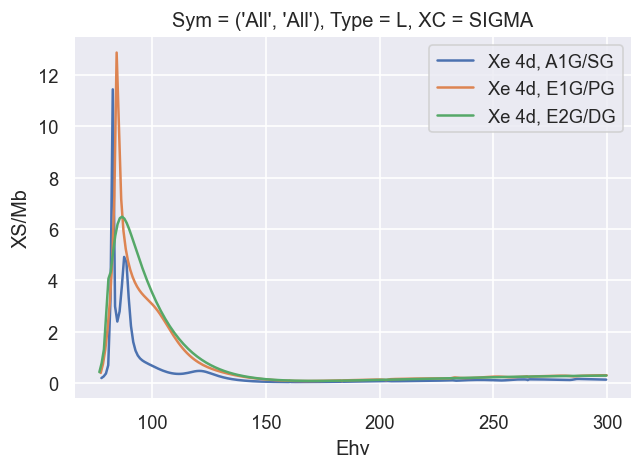

In [10]:
# Comparitive plot over datasets (all symmetries only)
Etype = 'Ehv'  # Set for Eke or Ehv energy scale
Erange=[50, 300]  # Plot range (full range if not passed to function below)
data.plotGetCroComp(pType='SIGMA', Etype = Etype, Erange = Erange)

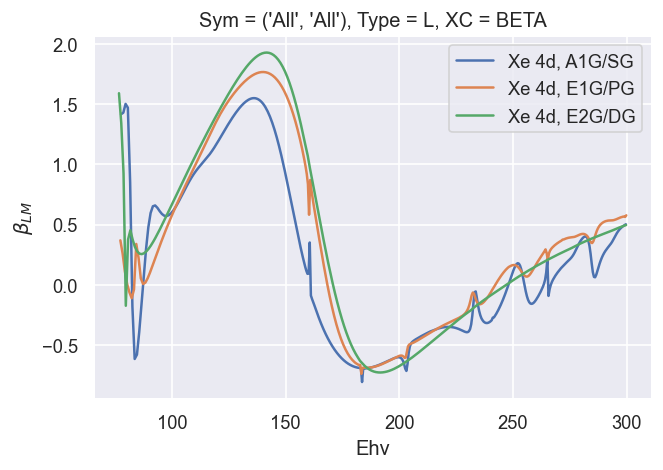

In [11]:
# Comparative plot over datasets (all symmetries only)
data.plotGetCroComp(pType='BETA', Etype=Etype, Erange=Erange)

### Branching ratios



In [12]:
# Stack XS data to new data structure
# NOTE: this is not quite correct, since it forces all data to same Ehv axis, but OK for a quick hack, and easy to pull out branching ratios
dsXS = xr.Dataset()  # Set blank dataset, this is easier for stacking, probably
lText = []

for key in data.data.keys():
    subset = data.data[key]['XS'].sel({'Sym':'All', 'XC':'SIGMA'})  # Set XS data, all syms only
    
    # NOTE currently missing full dataset resolution for orb24, so try interp. (2eV not 1eV step size)
    # Note dropna to ensure no NaNs, see http://xarray.pydata.org/en/latest/interpolation.html#interpolating-arrays-with-nan
    if key == 'orb24':
        subset = subset.dropna('Eke').interp(Eke = dsXS.Eke, method = 'cubic')
    
#     dsXS[key] = subset.copy()  # Set .copy() for safety here!
    dsXS[data.data[key]['jobNotes']['orbLabel']]  = subset.copy()  # Set .copy() for safety here!
    

# Convert to Xarray & normalise
dsXS = dsXS.to_array().rename({'variable':'channel'}).squeeze()
dsXS['total'] = dsXS.sum('channel')  # Sum over channels

# Normalise...
dsXS = dsXS/dsXS['total']


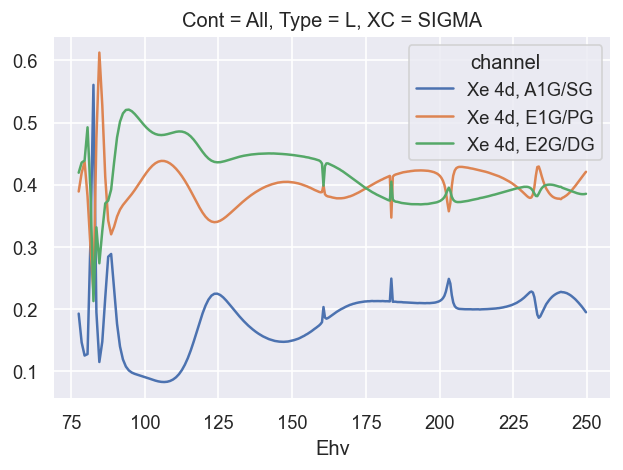

In [13]:
# Plot
Erange = [75, 250]
dsXS.swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').plot.line(x='Ehv');

These are broadly similar over the different gauges. There's quite a bit of low-E structure, and things smooth out at higher-E, with ~2:1 ratio between SG:PG or DG channels.

A detailed comparison with expt. is made below, for either the [SO summed case](#Comparison-plots...), or a [full SO simulation](#Spin-orbit-calculations) - this currently looks reasonable, but is still a work in progress.

## Experimental data
- Set 1: RF processed results, 02/10/20
- Set 2: DH ion yields, 27/10/20

In [14]:
# Load experimental data
dataPathExpt = Path(r'D:\projects\XeF2_Soleil_2019\RF_data_analysis_021020')

# Set data attribs in dict similar to ePS results structure
dataFiles = {}
dataFiles['SIGMA'] = {'Data':'XS', 'File':r'XeF2_Xe4d_4d32_4d52_cross_sec_all_photon_energies_02102020.dat', 
                      'States':['$4d_{3/2}$', '$4d_{5/2}$']}
dataFiles['BETA'] = {'Data':'Beta', 'File':r'XeF2_Xe4d_beta_all_photon_energies_02102020.dat', 
                     'States':['$\Pi_{1/2} (4d_{3/2})$', '$\Delta_{3/2} (4d_{3/2})$', '$\Sigma_{1/2} (4d_{5/2})$', 
                               '$\Pi_{3/2} (4d_{5/2})$', '$\Delta_{5/2} (4d_{5/2})$']}

dataFiles['BR-All'] = {'Data':'Branching ratios', 'File':r'XeF2_Xe4d_branching_all_photon_energies_all_states_01112020.dat', 
                      'States':['$\Pi_{1/2} (4d_{3/2})$', '$\Delta_{3/2} (4d_{3/2})$', '$\Sigma_{1/2} (4d_{5/2})$', 
                               '$\Pi_{3/2} (4d_{5/2})$', '$\Delta_{5/2} (4d_{5/2})$']}
dataFiles['BR-SO-summed'] = {'Data':'Branching ratios SO summed', 'File':r'XeF2_Xe4d_branching_all_photon_energies_SO_av_01112020.dat', 
                     'States':['$\Pi$', '$\Delta$', '$\Sigma$']}

# Update with ion data
dataFiles2 = {}
dataFiles2['ION-low'] = {'Data':'XS', 'File':r'XeF2_ion_yield_low_energy_cal.txt'}
dataFiles2['ION-high'] = {'Data':'XS', 'File':r'XeF2_ion_yield_high_energy_cal.txt'}
                         
# Update with branching ratios
# dataFilesBR = {}
# dataFilesBR['All'] = {'Data':'Branching ratios', 'File':r'XeF2_Xe4d_branching_all_photon_energies_all_states_01112020.dat', 
#                       'States':['\pi1/2 (4d3/2)', '\delta3/2 (4d3/2)', '\sigma1/2 (4d5/2)', '\pi3/2 (4d5/2)', '\delta5/2 (4d5/2)']}
# dataFiles['SO-summed'] = {'Data':'Branching ratios SO summed', 'File':r'XeF2_Xe4d_branching_all_photon_energies_SO_av_01112020.dat', 
#                      'States':['\pi', '\delta', '\sigma']}


In [15]:
# Read data files and convert to Xarray
# 27/10/20 added quick hack to set 2nd array for ion yield data
dataList = []
dataList2 = []
for key in dataFiles:
    dataIn = np.loadtxt(dataPathExpt/dataFiles[key]['File'])
    
    # Convert to Xarray
    dataXr = xr.DataArray(dataIn[:,1:], dims=('Ehv','State'), coords={'Ehv':dataIn[:,0], 'State':dataFiles[key]['States'][0:dataIn.shape[1]-1]})
    dataXr.attrs = dataFiles[key]
    dataXr.attrs['dataPath'] = dataPathExpt
    dataXr.name = key
    dataList.append(dataXr)

# Stack to Xarray
dataExpt = xr.concat(dataList, "XC")
dataExpt['XC'] = list(dataFiles.keys())

for key in dataFiles2:
    dataIn = np.loadtxt(dataPathExpt/dataFiles2[key]['File'])
    
    # Convert to Xarray
    dataXr = xr.DataArray(dataIn[:,1].squeeze(), dims=('Ehv'), coords={'Ehv':dataIn[:,0]})  # Only 1D datasets in this case
    dataXr.attrs = dataFiles2[key]
    dataXr.attrs['dataPath'] = dataPathExpt
    dataXr.name = key
    dataList2.append(dataXr)

dataExpt2 = xr.concat(dataList2, "XC")
dataExpt2['XC'] = list(dataFiles2.keys())

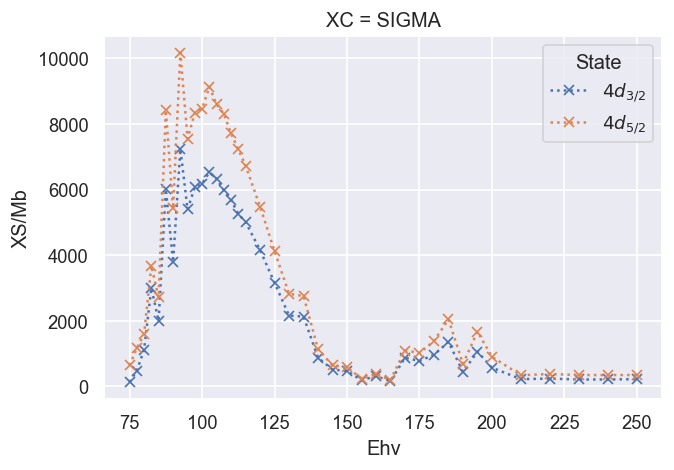

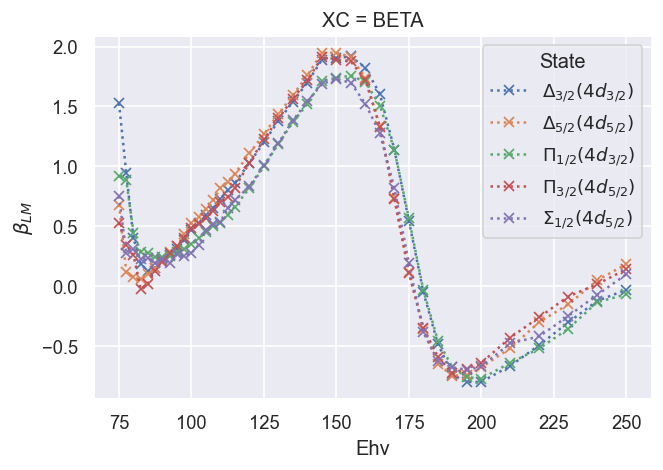

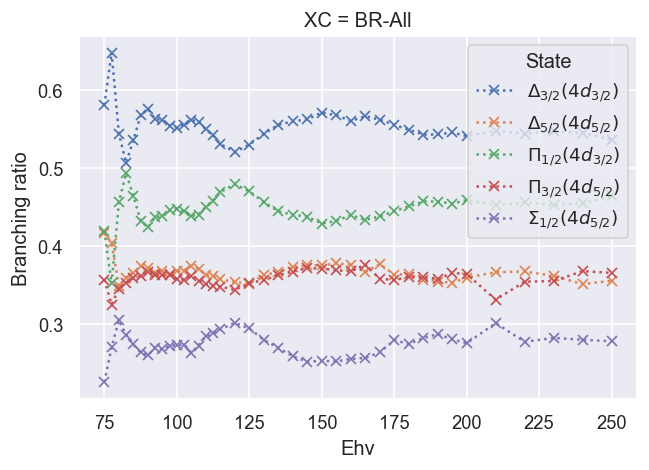

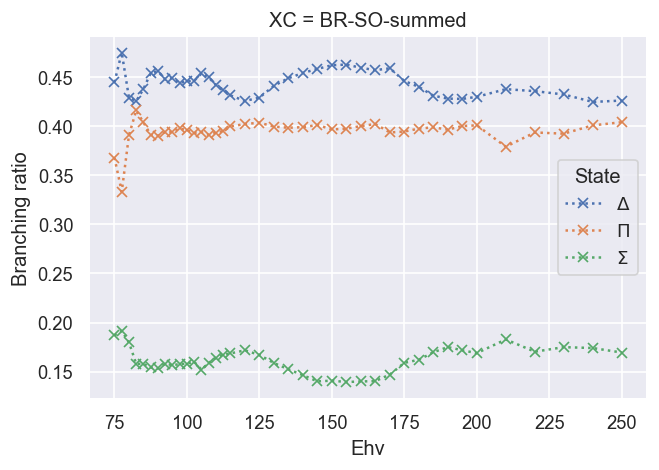

In [16]:
# Quick plot
marker = 'x'

for item in dataExpt:
    plt.figure() # Force new figure
    item.dropna('State').plot.line(x='Ehv', marker=marker, ls=':')  # Include dropna here to remove empty state dims

    # Fix axis labels
    if item.XC == 'SIGMA':
        plt.ylabel('XS/Mb')
    elif item.XC == 'BETA':
        plt.ylabel(r"$\beta_{LM}$")
    else:
        plt.ylabel("Branching ratio")

Note dataset labels here - this dataset has XS summed over spin-orbit states (labelled `4d3/2` and `4d5/2`), and betas for spin-orbit states.

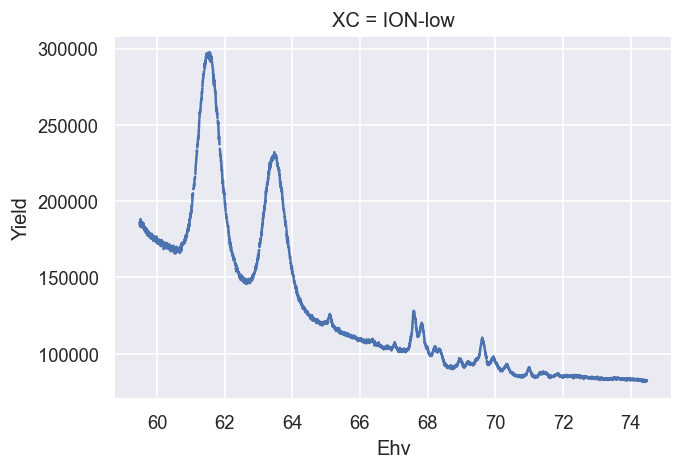

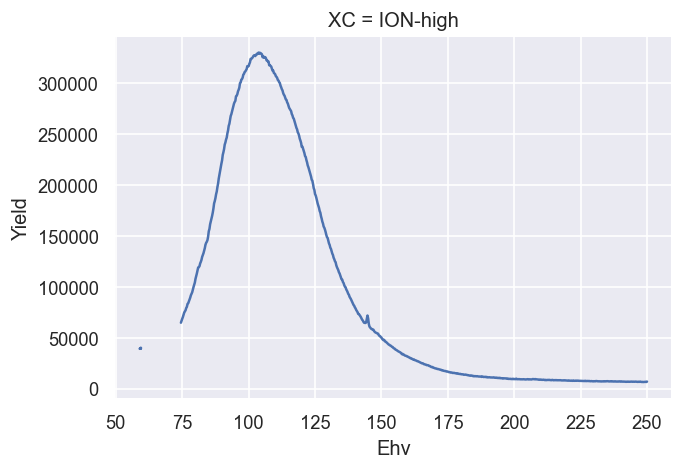

In [17]:
# Quick plot - Ion yields
marker = 'x'

for item in dataExpt2:
    plt.figure() # Force new figure
    item.plot.line(x='Ehv')  # Include dropna here to remove empty state dims

    # Fix axis labels
    plt.ylabel("Yield")

## Comparison plots...

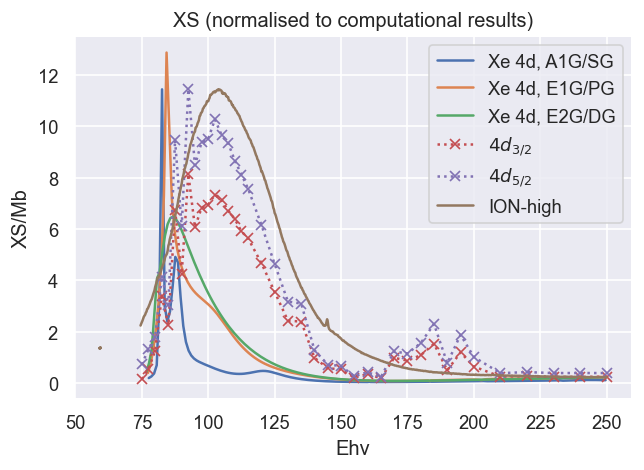

In [18]:
# Compare with computational results

pType = 'SIGMA'
Erange = [50, 250]
pltObj, lTextComp = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)
lText = lTextComp.copy()

# Add expt data - cross-secions
scale = dataExpt.sel({'XC':pType}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
(dataExpt.sel({'XC':pType})/scale).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Add expt data - ion yields
ionData = 'ION-high'
scale = dataExpt2.sel({'XC':ionData}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
(dataExpt2.sel({'XC':ionData})/scale).plot.line(x='Ehv');

# Manual legend fix
lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
lText.extend([ionData])
plt.legend(lText)

# Fix axis labels
if pType == 'SIGMA':
    plt.ylabel('XS/Mb')
    plt.title('XS (normalised to computational results)')
else:
    plt.ylabel(r"$\beta_{LM}$")
    plt.title(r"$\beta_{LM}$")

EDIT 27/10/20: now with ion yield data, which should be taken as the reliable experimental XS result. This doesn't show structure, but is broadly similar to the photoelectron measurements. Structure in photoelectron results to be ignored! Some of the previous comments still apply.


---
Original notes 13/10/20:

This is interesting... the structures in the computational XS look very similar to the experimental results, but on a much smaller energy scale. I suspect there could be many reasons for this in general (both computational and experimental)... but given that the betas match well (see below), this possibly suggests that this is a signature of multi-electron effects in the bound state. 

Some reasons this might be the case:

- The ePS computations are single active electron type calculations, hence do not include any multi-electron/state-mixing effects.
- The good agreement with the betas suggests that the scattering potential, hence continuum wavefunction and angular overlap integrals, are, however, well modelled in the computations.
- This, to me, points to the radial overlap integrals in the computations being quite different to reality, hence anything which strongly influences the radial wavefunction of the bound and/or continuum state. (As a side-note, the bond length used in the calculations could also have an effect here, this was 1.937A, pretty close to the lit value of 1.988A; any other state-mixing, e.g. vibronic couplings, could also play a role of course, although these might generally be expected to affect the angular momentum composition too.)
- Given that the 4d states are mixed, and we also expect multi-electron effects, the bound state seems the most likely candidate for this.

Any suggestions/comments here would be appreciated, since this is rather speculative, and I don't have a good overview of the spectroscopy and general expectations here at all.



---
04/11/20 - Added branching ratios comparison (rough)...

This shows the computational vs. SO summed experimental branching ratios. Not totally ideal, but should at least show the qualitative trends here. So far it looks roughly OK.

Text(0, 0.5, 'Branching ratio')

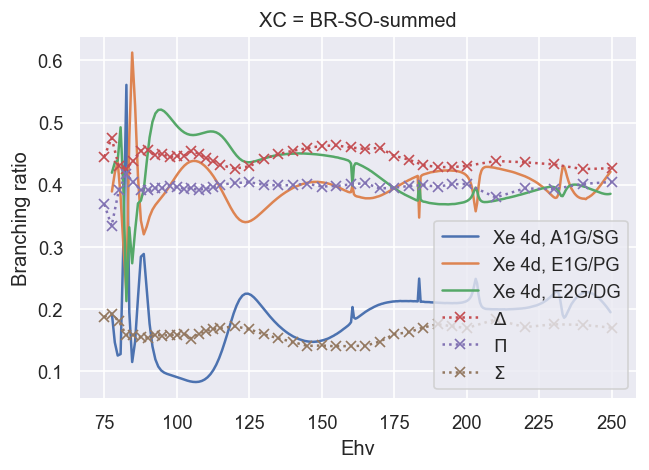

In [19]:
# Compare with computational results

pType = 'BR-SO-summed'

# pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)

dsXS.swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').plot.line(x='Ehv');

# Add expt data - cross-secions
# scale = dataExpt.sel({'XC':pType}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
scale = 1
(dataExpt.sel({'XC':pType})/scale).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Manual legend fix
lText = lTextComp.copy()
lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='lower right')

plt.ylabel("Branching ratio")

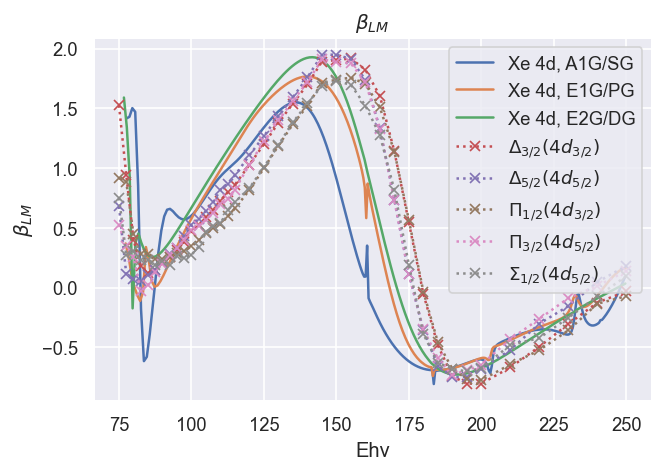

In [20]:
# Beta comparison plot over orbs
pType = 'BETA'
pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)

# Add expt data
dataExpt.sel({'XC':pType}).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Manual legend fix
lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText)

# Fix axis labels
if pType == 'SIGMA':
    plt.ylabel('XS/Mb')
    plt.title('XS (normalised to computational results)')
else:
    plt.ylabel(r"$\beta_{LM}$")
    plt.title(r"$\beta_{LM}$")

As previously, applying an energy shift to the data gives a very nice agreement for the betas...

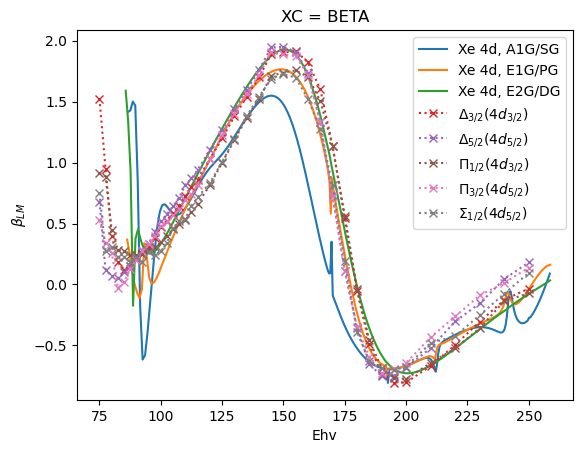

In [360]:
Eshift = 9.0  # NOTE - this breaks energy selection code later, for some reason - float type and/or tolerance in slice?

# Beta comparison plot over orbs
pType = 'BETA'
pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, Eshift = Eshift, returnHandles = True)

# Add expt data
dataExpt.sel({'XC':pType}).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Manual legend fix
lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText)

# Fix axis labels
if pType == 'SIGMA':
    plt.ylabel('XS/Mb')
else:
    plt.ylabel(r"$\beta_{LM}$")

## Spin-orbit calculations

### Formalism

For ion SO case only, should be very similar to "molecular" form from old (old) work, so use this as a paradigm. In terms of ion electronic state only, using Hund's case b/c notation
(essentially identical if one neglects rotational ang. mom.):

\begin{equation}
C^{SO}(L,J,S)=\left(\begin{array}{ccc}
L & J & S\\
M_{L} & M_{J} & M_{S}
\end{array}\right)\left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)
\end{equation}

And coherent sum:

\begin{equation}
\Xi(L,J,S)=\sum_{all\,projections}C^{SO}(L,J,S)C^{SO}(L',J',S')=\sum_{all\,projections}\left(\begin{array}{ccc}
L & J & S\\
M_{L} & M_{J} & M_{S}
\end{array}\right)\left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)\left(\begin{array}{ccc}
L' & J' & S'\\
M'_{L} & M'_{J} & M'_{S}
\end{array}\right)\left(\begin{array}{ccc}
L' & J' & S'\\
\Lambda' & \Omega' & \Sigma'
\end{array}\right)
\end{equation}


All states will be modulated by coherent sum - if this is summed over all projection terms then it collapses to a $6j$
(need to check phases carefully here however!). If a single set of $(L,J,S)$ are assumed (i.e. states are resolved), $L=L',\,J=J',\,S=S'$. Assuming all (lab frame) $M$ are equally populated, only the MF term will affect things, so we'll only need the square of the term with $(\Lambda,\Omega,\Sigma)$ in the present case:

\begin{eqnarray}
\Xi^{MF}(L,J,S) & = & \sum_{all\,unresolved}\left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)\left(\begin{array}{ccc}
L & J & S\\
\Lambda' & \Omega' & \Sigma'
\end{array}\right)\\
 & = & \left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)^{2}
\end{eqnarray}

Where the first line is applicable in the case of unresolved states, and the second if all QNs are defined.

TODO: derive this properly... likely missing some sign conventions/phases here, although will fall out in the numerics if all +- term combinations are included.

Refs (see also refs. therein):

- Hockett, Paul, and Katharine L Reid. “Complete Determination of the Photoionization Dynamics of a Polyatomic Molecule. II. Determination of Radial Dipole Matrix Elements and Phases from Experimental Photoelectron Angular Distributions from A1Au Acetylene.” The Journal of Chemical Physics 127, no. 15 (October 2007): 154308. https://doi.org/10.1063/1.2790443.

- Hockett, Paul. “Photoionization Dynamics of Polyatomic Molecules.” PhD Thesis, University of Nottingham, 2009. http://eprints.nottingham.ac.uk/10857/.


### Application to $XeF_{2}(4d^{-1})$

In this case we set the following for the spin-orbit splitting in the ion (TBC!):

- $L, S$ corresponds to the $4d$ unpaired electon, 
- $J = L\pm S$
- Hence the overall term is $^{2s+1}L_{J}=^{2}D_{3/2,5/2}$
- $\Lambda$ corresponds to the ligand-field split components (equivalently, the components of the 4d orbital), $\Lambda = 0, 1, 2$, corresponding to $\Sigma, \Pi, \Delta$ components or, equivalently, the A1G/SG, E1G/PG, E2G/DG ab initio states respectively.

### Tests

In [22]:
from epsproc.geomFunc.geomUtils import genllLList
from epsproc.geomFunc.geomCalc import w3jTable

# Gen QNs for specific (L,S) case
L = 2
S = 0.5

Llist = np.array([[L,L+S,S], [L, L, S], [L,L-S,S]])   # Note this needs to be 2D array in current form of function
QNs = genllLList(Llist, uniqueFlag = False)

# Then calc 3js....
backend = 'sympy'
form = 'xdaLM'  # '2d'  # 'xdaLM'  # xds
nonzeroFlag = True

dlist = ['L', 'J', 'S', 'Lambda', 'Omega', 'Sigma']  # Set dims for reference

thrj = w3jTable(QNs = QNs, nonzeroFlag = nonzeroFlag, form = form, dlist = dlist, backend = backend)

# And primed terms (will be identical at this point, but set dims for multiplication later)
thrjP = w3jTable(QNs = QNs, nonzeroFlag = nonzeroFlag, form = form, dlist = [item + 'p' for item in dlist], backend = backend)

In [56]:
# BASIC case of single 3j term
pdTable, _ = ep.multiDimXrToPD(thrj, colDims = 'Lambda')
pdTable

Lambda                       -2.0      -1.0       0.0       1.0       2.0
J   L   Omega S   Sigma                                                  
1.5 2.0 -1.5  0.5 -0.5        NaN       NaN       NaN       NaN -0.447214
                   0.5        NaN       NaN       NaN  0.223607       NaN
        -0.5  0.5 -0.5        NaN       NaN       NaN  0.387298       NaN
                   0.5        NaN       NaN -0.316228       NaN       NaN
         0.5  0.5 -0.5        NaN       NaN -0.316228       NaN       NaN
                   0.5        NaN  0.387298       NaN       NaN       NaN
         1.5  0.5 -0.5        NaN  0.223607       NaN       NaN       NaN
                   0.5  -0.447214       NaN       NaN       NaN       NaN
2.5 2.0 -2.5  0.5  0.5        NaN       NaN       NaN       NaN -0.408248
        -1.5  0.5 -0.5        NaN       NaN       NaN       NaN  0.182574
                   0.5        NaN       NaN       NaN  0.365148       NaN
        -0.5  0.5 -0.5        NaN       NaN       NaN -0.258199       NaN
                   0.5        NaN       NaN -0.316228       NaN       NaN
         0.5  0.5 -0.5        NaN       NaN  0.316228       NaN       NaN
                   0.5        NaN  0.258199       NaN       NaN       NaN
         1.5  0.5 -0.5        NaN -0.365148       NaN       NaN       NaN
                   0.5  -0.182574       NaN       NaN       NaN       NaN
         2.5  0.5 -0.5   0.408248       NaN       NaN       NaN       NaN

This seems OK... but has more allowed states than the experimental assignments, in particular $J=3/2,\Sigma_1/2$ is non-zero, and there are additional terms in $\Omega$. This all seems to be correct for the 3j term alone, so I'm presumably just missing some other effects here (e.g. parity restriction), and the $\Omega$ terms maybe degenerate (?). It could also be an issue with the choice of Hund's case coupling here... I need to look into the spectroscopy a bit more here to confirm. 

For now, we'll assume the best and see how the results look...

In [294]:
# Reformate by comsolidating +/- terms as modulation for XS and square
thrjUS = thrj.unstack('mSet').fillna(0)
# thrjXSmod = 2*(thrjUS.sum('Sigma').where((thrjUS['Lambda']>-0.5)&(thrjUS['Omega']<0.5), drop=True))**2  # Note Lambda & Omega anti-phase!
thrjXSmod = 2*(thrjUS.sum('Sigma').where((thrjUS['Lambda']>-0.5)&(thrjUS['Omega']<0.5), drop=True))**2  # Note Lambda & Omega anti-phase!
thrjXSmod['Omega'] = np.abs(thrjXSmod['Omega'])

pdTable, _ = ep.multiDimXrToPD(thrjXSmod, colDims = 'Lambda')
pdTable

Lambda             0.0       1.0       2.0
J   L   Omega S                           
1.5 2.0 2.5   0.5  0.0  0.000000  0.000000
        1.5   0.5  0.0  0.100000  0.400000
        0.5   0.5  0.2  0.300000  0.000000
2.5 2.0 2.5   0.5  0.0  0.000000  0.333333
        1.5   0.5  0.0  0.266667  0.066667
        0.5   0.5  0.2  0.133333  0.000000

For the coherent case, allow all terms in projection pairs (unprimed & primed), then sum and/or subselect as required.

In [47]:
# Terms for coherent case
thrjSumCoherent = (thrj).unstack('mSet').fillna(0) *  (thrjP).unstack('mSet').fillna(0)

# Sum over spin only, specify Omega = Omega', and Lambda = Lambda'
thrjSumCoherent = thrjSumCoherent.sum(['Sigmap', 'Sigma']).where(thrjSumCoherent['Omega']==thrjSumCoherent['Omegap']).where(thrjSumCoherent['Lambda']==thrjSumCoherent['Lambdap'])

# Drop (sum) redundant coords & reindex
thrjXSmodCoherent = 2*thrjSumCoherent.sum(['Omegap','Lambdap']).where((thrjUS['Lambda']>-0.5)&(thrjUS['Omega']<0.5), drop=True)
thrjXSmodCoherent['Omega'] = np.abs(thrjXSmodCoherent['Omega'])

pdTable, _ = ep.multiDimXrToPD(thrjXSmodCoherent, colDims = 'Lambda')  # 

pdTable

Lambda             0.0       1.0       2.0
J   L   Omega S                           
1.5 2.0 2.5   0.5  0.0  0.000000  0.000000
        1.5   0.5  0.0  0.100000  0.400000
        0.5   0.5  0.2  0.300000  0.000000
2.5 2.0 2.5   0.5  0.0  0.000000  0.333333
        1.5   0.5  0.0  0.266667  0.066667
        0.5   0.5  0.2  0.133333  0.000000

Same result here, since the sum over $\Sigma,\Sigma'$ is just a degeneracy factor, and other terms are set to be equal (no additional coherences), which shows the numerics are OK!

If we assume that $\Omega$ remains coherent (unresolved)...

In [59]:
# Terms for coherent case
thrjSumCoherent = (thrj).unstack('mSet').fillna(0) *  (thrjP).unstack('mSet').fillna(0)

# Sum over spin only, specify Lambda = Lambda'
thrjSumCoherent = thrjSumCoherent.sum(['Sigmap', 'Sigma']).where(thrjSumCoherent['Lambda']==thrjSumCoherent['Lambdap'])
# pdTable, _ = ep.multiDimXrToPD(thrjSumCoherent, colDims = 'Lambda')  # 

# Drop (sum) redundant coords & reindex
thrjXSmodCoherent = 2*thrjSumCoherent.sum(['Omegap','Lambdap']).where((thrjUS['Lambda']>-0.5)&(thrjUS['Omega']<0.5), drop=True)
thrjXSmodCoherent['Omega'] = np.abs(thrjXSmodCoherent['Omega'])

pdTable, _ = ep.multiDimXrToPD(thrjXSmodCoherent, colDims = 'Lambda')  # 

pdTable

Lambda             0.0       1.0       2.0
J   L   Omega S                           
1.5 2.0 2.5   0.5  0.0  0.000000  0.000000
        1.5   0.5  0.0  0.273205  0.400000
        0.5   0.5  0.4  0.473205  0.000000
2.5 2.0 2.5   0.5  0.0  0.000000  0.184262
        1.5   0.5  0.0  0.078105 -0.082405
        0.5   0.5  0.0 -0.055228  0.000000

Here the $\Sigma_{1/2}$ term goes to zero for $J=5/2$... this might be genuine, or simply a phase issue in the summation! There are also negative values present, which likely points to the same issue.

If we treat this as per Hund's case (c), and assume it is $\Lambda$ which is unresolved/undefined,

In [306]:
# Terms for coherent case
thrjSumCoherent = (thrj).unstack('mSet').fillna(0) *  (thrjP).unstack('mSet').fillna(0)

# Sum over spin only, specify Omega = Omega'
thrjSumCoherent = thrjSumCoherent.sum(['Sigmap', 'Sigma']).where(thrjSumCoherent['Omega']==thrjSumCoherent['Omegap'])
# pdTable, _ = ep.multiDimXrToPD(thrjSumCoherent, colDims = 'Lambda')  # 

# Drop (sum) redundant coords & reindex
thrjXSmodCoherent = 2*thrjSumCoherent.sum(['Omegap','Lambdap']).where((thrjUS['Lambda']>-0.5)&(thrjUS['Omega']<0.5), drop=True)
thrjXSmodCoherent['Omega'] = np.abs(thrjXSmodCoherent['Omega'])

pdTable, _ = ep.multiDimXrToPD(thrjXSmodCoherent, colDims = 'Lambda')  # 

pdTable

Lambda                  0.0       1.0       2.0
J   L   Omega S                                
1.5 2.0 2.5   0.5  0.000000  0.000000  0.000000
        1.5   0.5  0.000000 -0.100000  0.200000
        0.5   0.5 -0.044949  0.055051  0.000000
2.5 2.0 2.5   0.5  0.000000  0.000000  0.333333
        1.5   0.5  0.000000  0.400000  0.200000
        0.5   0.5  0.363299  0.296633  0.000000

### SO Branching ratios

Assuming that the above is "correct" the branching ratios should follow fairly directly...

First, define a basic function to multiply by 3j term(s) and set branching ratios. Then test for some different cases...

In [274]:
# Test SO multiplication terms

# 11/11/20 - converted to function

def simulateSOBR(dsXS, thrjSOTerm, BRtype = 'All', coupling = 'Lambda', stateLabels = ['$\Sigma$', '$\Pi$', '$\Delta$']):
    # Set Lambda terms
    # dsXS['Lambda'] = dsXS['channel']
    # dsXS['Lambda'] = [0.0, 1.0, 2.0]
    
    dsXSO = dsXS.assign_coords({coupling:('channel',thrjSOTerm[coupling])}).swap_dims({'channel':coupling})  # Assign Lambda for multiplication
    
    dsXSO = dsXSO.assign_coords({f'{coupling}-Labels':(coupling, np.asarray(stateLabels)[dsXSO[coupling].astype(int).data])})  # Assign labels, based on int values as indexers (CRUDE!)


        
    dsXSO = dsXSO * thrjSOTerm 
    # dsXS

    # Convert to branching ratios (total)
    if BRtype == 'All':
#         dsXSO['total'] = dsXSO.sum(['Lambda', 'Omega', 'lSet'])  # Sum over channels
        dsXSO['total'] = dsXSO.sum(thrjSOTerm.dims)
    
    elif BRtype == 'J':
        dsXSO['total'] = dsXSO.sum(['Lambda', 'Omega'])  # Sum over channels, except J - GIVES same result? 
        
    elif BRtype == 'None':
        dsXSO['total'] = 1.0
        
    else:
        print(f'BRtype={BRtype} not recognised.')
        return

    # # Set branching ratios
    dsXSO = dsXSO/dsXSO['total']

    return dsXSO

#### **Assuming $\Lambda$ good QN**

Label levels by $\Lambda$, and use all $\Omega$ components in summation.

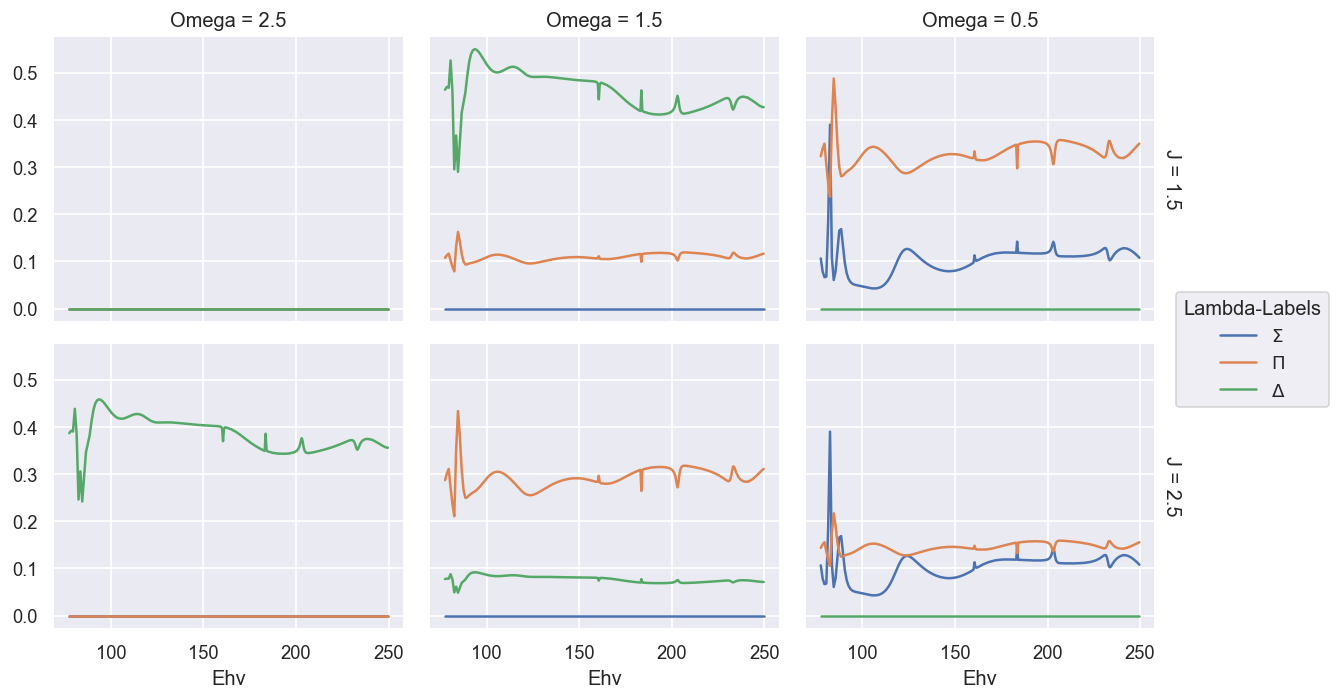

In [338]:
# For the state-resolved case
dsXSO = simulateSOBR(dsXS, thrjXSmod, BRtype = 'J')

# Plot
Etype = 'Ehv'
Erange = [75, 250]
dsXSO.swap_dims({'Eke':'Ehv', 'Lambda':'Lambda-Labels'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').unstack().squeeze().plot.line(x='Ehv', col = 'Omega', row = 'J');
# dsXSO.swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').unstack().squeeze().plot.line(x='Ehv', col = 'Omega', row = 'J');

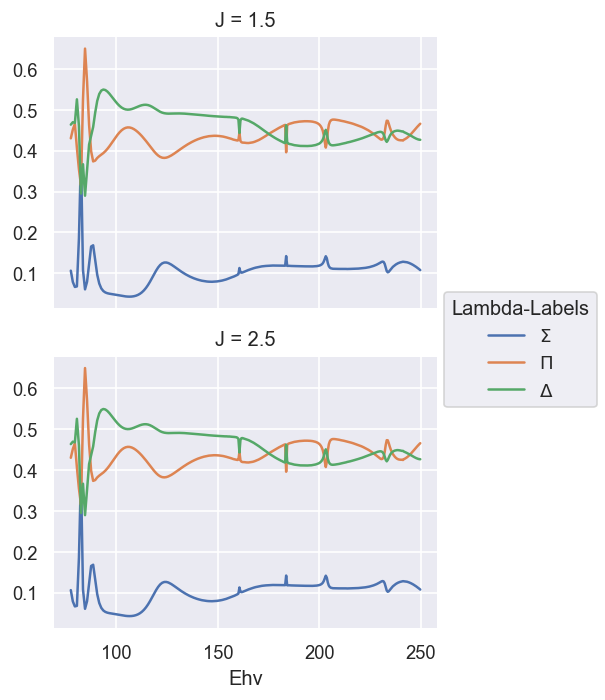

In [339]:
# Summed over Omega
# Note J states look essentially identical here, as they should in the absence of any other modulating factors!
dsXSO.swap_dims({'Eke':'Ehv', 'Lambda':'Lambda-Labels'}).sum('Omega').sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').unstack().squeeze().plot.line(x='Ehv', row = 'J');

Text(0.5, 1.0, "Simulated branching ratios, J=1.5, Hund's case (c)")

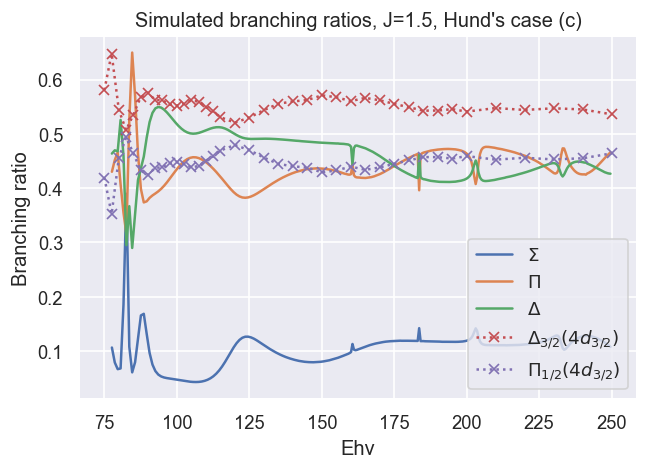

In [341]:
# Compare with computational results

pType = 'BR-All'

# pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)

# Loop over allowed Omega terms and add to plot
# for omega in dsXSO.Omega:
#     J=2.5
#     (2*dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J, Omega=omega).squeeze().plot.line(x='Ehv');

# Loop over J, sum Omega
# for J in dsXSO.J:
#     (dsXSO).sum('Lambda').swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J.item()).squeeze().plot.line(x='Ehv');

# Selected term(s) only
J=1.5
dsPlot = (dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J).sum('Omega').squeeze()
dsPlot.plot.line(x='Ehv');

# Add expt data - cross-secions
# scale = dataExpt.sel({'XC':pType}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
scale = 1

# All data
# (dataExpt.sel({'XC':pType})/scale).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Selected states only
statesPlot = ['$\\Delta_{3/2} (4d_{3/2})$', '$\\Pi_{1/2} (4d_{3/2})$']
(dataExpt.sel({'XC':pType, 'State':statesPlot})/scale).plot.line(x='Ehv', marker=marker, ls=':');


# Manual legend fix
lText = list(dsPlot['Lambda-Labels'].data)
lText.extend(statesPlot)
# lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='lower right')

plt.ylabel("Branching ratio")
plt.title(f'Simulated branching ratios, J={J}, Hund\'s case (c)')

Text(0.5, 1.0, "Simulated branching ratios, J=2.5, Hund's case (c)")

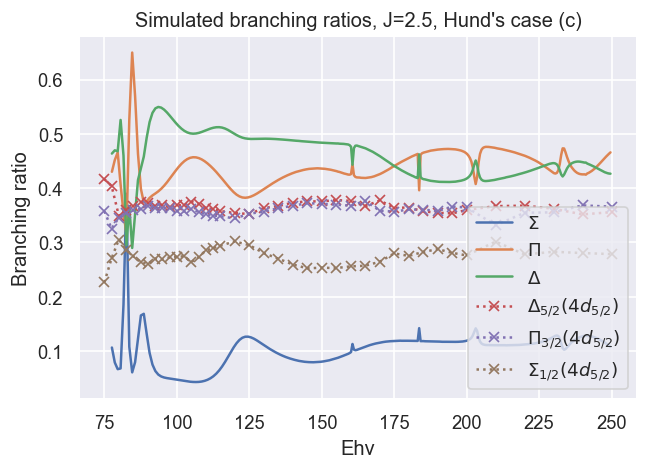

In [342]:
# Compare with computational results

pType = 'BR-All'

# pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)

# Loop over allowed Omega terms and add to plot
# for omega in dsXSO.Omega:
#     J=2.5
#     (2*dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J, Omega=omega).squeeze().plot.line(x='Ehv');

# Loop over J, sum Omega
# for J in dsXSO.J:
#     (dsXSO).sum('Lambda').swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J.item()).squeeze().plot.line(x='Ehv');

# Selected term(s) only
J=2.5
(dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J).sum('Omega').squeeze().plot.line(x='Ehv');

# Add expt data - cross-secions
# scale = dataExpt.sel({'XC':pType}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
scale = 1

# All data
# (dataExpt.sel({'XC':pType})/scale).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Selected states only
statesPlot = ['$\\Delta_{5/2} (4d_{5/2})$', '$\\Pi_{3/2} (4d_{5/2})$', '$\\Sigma_{1/2} (4d_{5/2})$']
(dataExpt.sel({'XC':pType, 'State':statesPlot})/scale).plot.line(x='Ehv', marker=marker, ls=':');


# Manual legend fix
lText = list(dsPlot['Lambda-Labels'].data)
lText.extend(statesPlot)
# lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='lower right')

plt.ylabel("Branching ratio")
plt.title(f'Simulated branching ratios, J={J}, Hund\'s case (c)')

This does not look very convincing... too many states, and not a good match to the experimental BRs.

#### **Assuming $\Omega$ good QN** (should be correct for Hund's case c), and that it labels states...

Label levels by $\Omega$, and use all $\Lambda$ components in summation.

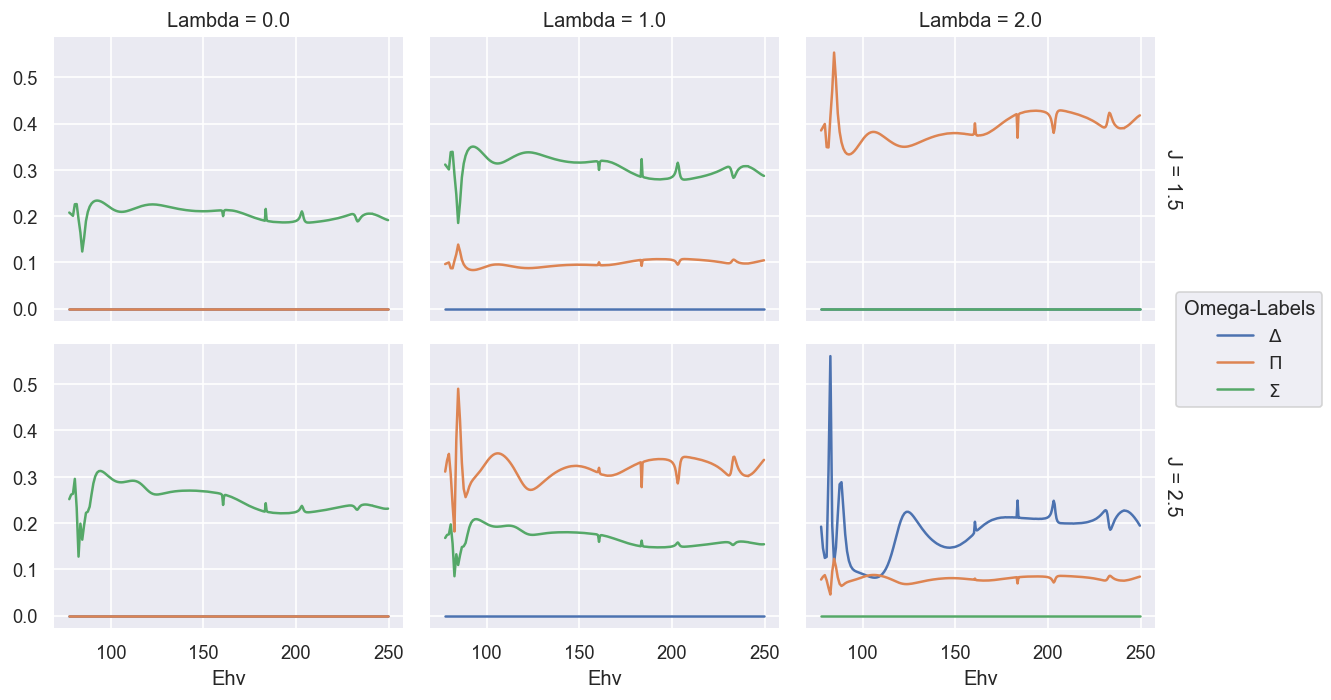

In [343]:
# For the state-resolved case
# *** WITH Omega & Lambda switched (Hund's case c)
# This seems to give better results, but may still be incorrect - should just subselect terms instead of sum?

dsXSO = simulateSOBR(dsXS, thrjXSmod, BRtype = 'J', coupling = 'Omega')

# Plot
Etype = 'Ehv'
Erange = [75, 250]
dsXSO.swap_dims({'Eke':'Ehv', 'Omega':'Omega-Labels'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').unstack().squeeze().plot.line(x='Ehv', col = 'Lambda', row = 'J');
# dsXSO.swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').unstack().squeeze().plot.line(x='Ehv', col = 'Lambda', row = 'J');

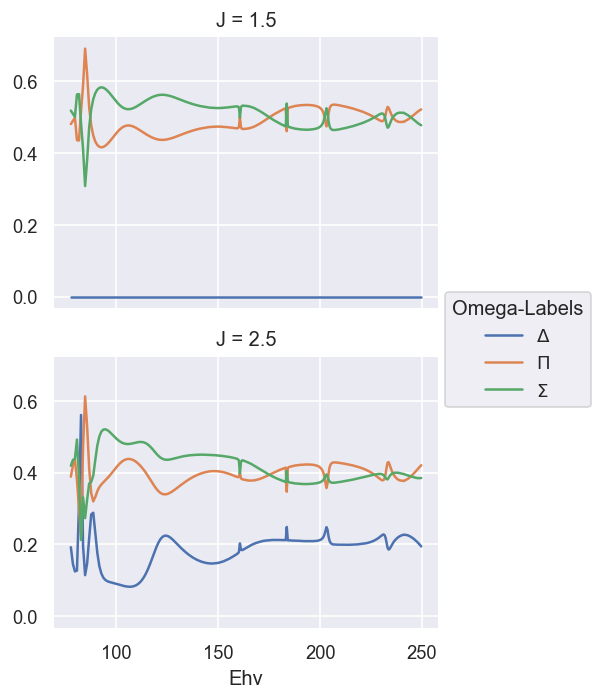

In [344]:
# Summed over Lambda
# Note J states look essentially identical here, as they should in the absence of any other modulating factors!
dsXSO.swap_dims({'Eke':'Ehv', 'Omega':'Omega-Labels'}).sum('Lambda').sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').unstack().squeeze().plot.line(x='Ehv', row = 'J');

Text(0.5, 1.0, "Simulated branching ratios, J=1.5, Hund's case (c)")

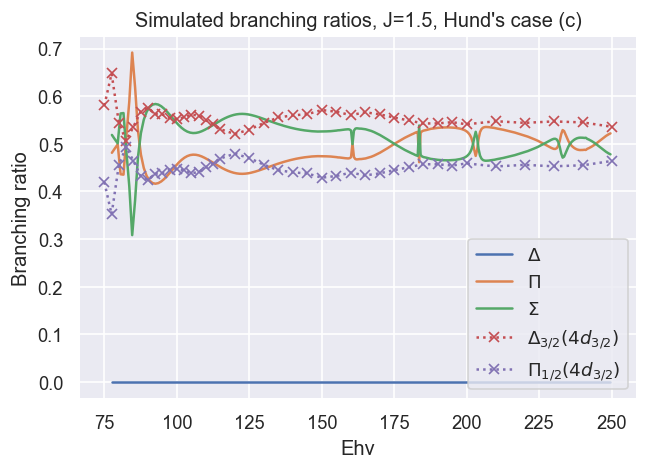

In [345]:
# Compare with computational results

pType = 'BR-All'

# pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)

# Loop over allowed Omega terms and add to plot
# for omega in dsXSO.Omega:
#     J=2.5
#     (2*dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J, Omega=omega).squeeze().plot.line(x='Ehv');

# Loop over J, sum Omega
# for J in dsXSO.J:
#     (dsXSO).sum('Lambda').swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J.item()).squeeze().plot.line(x='Ehv');

# Selected term(s) only
J=1.5
dsPlot = (dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J).sum('Lambda').squeeze()
dsPlot.plot.line(x='Ehv');

# Add expt data - cross-secions
# scale = dataExpt.sel({'XC':pType}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
scale = 1

# All data
# (dataExpt.sel({'XC':pType})/scale).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Selected states only
statesPlot = ['$\\Delta_{3/2} (4d_{3/2})$', '$\\Pi_{1/2} (4d_{3/2})$']
(dataExpt.sel({'XC':pType, 'State':statesPlot})/scale).plot.line(x='Ehv', marker=marker, ls=':');


# Manual legend fix
lText = list(dsPlot['Omega-Labels'].data)
lText.extend(statesPlot)
# lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='lower right')

plt.ylabel("Branching ratio")
plt.title(f'Simulated branching ratios, J={J}, Hund\'s case (c)')

Text(0.5, 1.0, "Simulated branching ratios, J=2.5, Hund's case (c)")

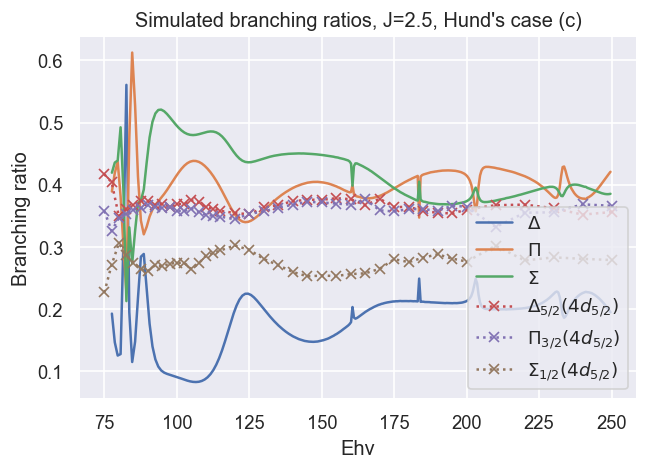

In [346]:
# Compare with computational results

pType = 'BR-All'

# pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)

# Loop over allowed Omega terms and add to plot
# for omega in dsXSO.Omega:
#     J=2.5
#     (2*dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J, Omega=omega).squeeze().plot.line(x='Ehv');

# Loop over J, sum Omega
# for J in dsXSO.J:
#     (dsXSO).sum('Lambda').swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J.item()).squeeze().plot.line(x='Ehv');

# Selected term(s) only
J=2.5
(dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J).sum('Lambda').squeeze().plot.line(x='Ehv');

# Add expt data - cross-secions
# scale = dataExpt.sel({'XC':pType}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
scale = 1

# All data
# (dataExpt.sel({'XC':pType})/scale).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Selected states only
statesPlot = ['$\\Delta_{5/2} (4d_{5/2})$', '$\\Pi_{3/2} (4d_{5/2})$', '$\\Sigma_{1/2} (4d_{5/2})$']
(dataExpt.sel({'XC':pType, 'State':statesPlot})/scale).plot.line(x='Ehv', marker=marker, ls=':');


# Manual legend fix
lText = list(dsPlot['Omega-Labels'].data)
lText.extend(statesPlot)
# lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='lower right')

plt.ylabel("Branching ratio")
plt.title(f'Simulated branching ratios, J={J}, Hund\'s case (c)')

This looks quite reasonable, with the same number (although different ordering) of states assigned experimentally. Could still be coupling case problem? Also looks to be a relative phase issue/flip in J=3/2 case?

#### **State selected** Assuming both $\Lambda$ and $\Omega$ are defined... as per experimental assignments (?)

Label levels by ($\Omega$, $\Lambda$), with no additional summation over terms. Q: is this justified/realistic?

Text(0.5, 1.0, "Simulated branching ratios, J=1.5, Hund's case (c), with subselection (no summation)")

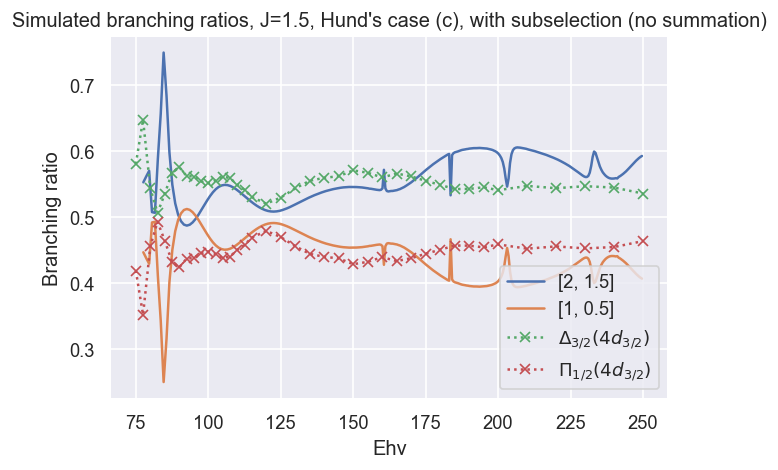

In [348]:
# Selected term(s) only - LOOKS GOOD FOR coupling='Omega' case, but opposite phases for coupling='Lambda'
dsXSO = simulateSOBR(dsXS, thrjXSmod, BRtype = 'None', coupling='Omega')  # This looks good
# dsXSO = simulateSOBR(dsXS, np.abs(thrjXSmodCoherent), BRtype = 'None', coupling='Lambda')  # Testing coherent case

# Unnorm
# dsXSO *= dsXSO['total']

# Selected term(s) only
J=1.5
OLset = [[2,1.5], [1,0.5]] # [Omega, Lambda] pairs to match expt.

# J=2.5
# OLset = [[2,2.5], [1,1.5], [0,0.5]] # [Omega, Lambda] pairs to match expt.

# subset = xr.DataArray()
subset = []
for OL in OLset:
    subset.append((dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J, Lambda=OL[0], Omega=OL[1]))

subsetXS = xr.concat(subset, dim='Omega').squeeze()

# Renorm
subsetXS = subsetXS/subsetXS.sum('Omega')

subsetXS.plot.line(x=Etype)

# Selected states only
if J == 1.5:
    statesPlot = ['$\\Delta_{3/2} (4d_{3/2})$', '$\\Pi_{1/2} (4d_{3/2})$']
else:
    statesPlot = ['$\\Delta_{5/2} (4d_{5/2})$', '$\\Pi_{3/2} (4d_{5/2})$', '$\\Sigma_{1/2} (4d_{5/2})$']
    
(dataExpt.sel({'XC':pType, 'State':statesPlot})/scale).plot.line(x='Ehv', marker=marker, ls=':');


# Manual legend fix
# lText = list(subsetXS['Omega'].data)
lText = list(OLset)
# lText = list(subsetXS['Lambda'].data)
lText.extend(statesPlot)
# lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='lower right')

plt.ylabel("Branching ratio")
plt.title(f'Simulated branching ratios, J={J}, Hund\'s case (c), with subselection (no summation)')

Text(0.5, 1.0, "Simulated branching ratios, J=2.5, Hund's case (c), with subselection (no summation)")

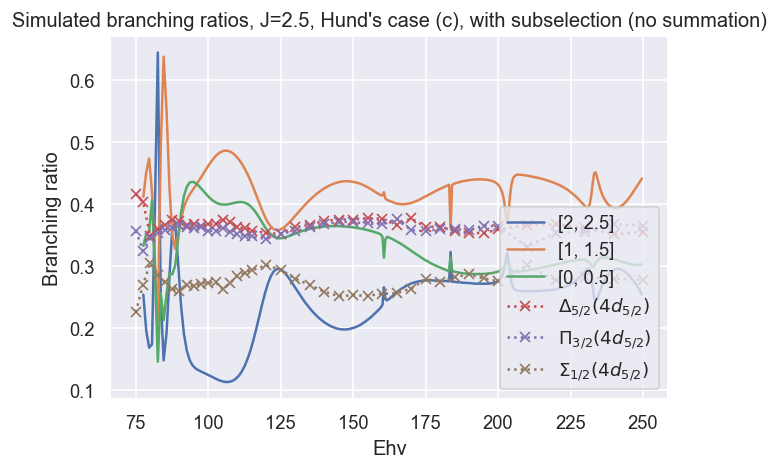

In [350]:
# Selected term(s) only
# Selected term(s) only - LOOKS GOOD FOR coupling='Omega' case, but opposite phases for coupling='Lambda'
# For J = 5/2 'Lambda' case is possibly better, at least for state ordering? DO NOT UNDERSTAND THIS YET!

dsXSO = simulateSOBR(dsXS, thrjXSmod, BRtype = 'None', coupling='Omega')

# Unnorm
# dsXSO *= dsXSO['total']

# Selected term(s) only
# J=1.5
# OLset = [[2,1.5], [1,0.5]] # [Omega, Lambda] pairs to match expt.

J=2.5
OLset = [[2,2.5], [1,1.5], [0,0.5]] # [Omega, Lambda] pairs to match expt.

# subset = xr.DataArray()
subset = []
for OL in OLset:
    subset.append((dsXSO).swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L', J=J, Lambda=OL[0], Omega=OL[1]))

subsetXS = xr.concat(subset, dim='Omega').squeeze()

# Renorm
subsetXS = subsetXS/subsetXS.sum('Omega')

subsetXS.plot.line(x=Etype)

# Selected states only
if J == 1.5:
    statesPlot = ['$\\Delta_{3/2} (4d_{3/2})$', '$\\Pi_{1/2} (4d_{3/2})$']
else:
    statesPlot = ['$\\Delta_{5/2} (4d_{5/2})$', '$\\Pi_{3/2} (4d_{5/2})$', '$\\Sigma_{1/2} (4d_{5/2})$']
    
(dataExpt.sel({'XC':pType, 'State':statesPlot})/scale).plot.line(x='Ehv', marker=marker, ls=':');


# Manual legend fix
# lText = list(subsetXS['Omega'].data)
lText = list(OLset)
# lText = list(subsetXS['Lambda'].data)
lText.extend(statesPlot)
# lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='lower right')

plt.ylabel("Branching ratio")
plt.title(f'Simulated branching ratios, J={J}, Hund\'s case (c), with subselection (no summation)')

Not too bad for Hund's case (c), plus subselecting to match only the states assigned experimentally. This looks really nice for J=3/2, and not too bad for J=5/2, although I get different state ordering in that case (treating as Hund's case (b) possibly gives a better result in this case, but is that justified?).

q's

- Is the formalism correct?
- Are these numerics correct... may be issue with final subselected results due to choice of leading dim in multiplication?
- SPECTROSCOPY?
- Experimental assignments OK?
- Experimental data uncertainties, might expect more bleed between partially-resolved J=5/2 features.


## Addendum

### Molecular orbitals

SEE: https://epsproc.readthedocs.io/en/dev/methods/ePSproc_orbPlot_tests_130520.html

In [351]:
from epsproc.vol import orbPlot

# chemPath = r'/home/femtolab/python/chem/tools/chemlab/chemlab'  # Linux dev machine
chemPath = r'D:\temp\chemlab\chemlab'  # Win dev machine
out = orbPlot.importChemLabQC(chemPath = chemPath)

# Test class
# filename = r"/home/femtolab/ePS/XeF2/electronic_structure/xef2_SPKrATZP_rel_geom.log"  # XeF2 Gamess file  OK
filename = r"D:\projects\ePolyScat\xef2\electronic_structure\xef2_SPKrATZP_rel_geom.log"

mo = orbPlot.molOrbPlotter(chemPath = chemPath, fileIn = filename)


Import OK: Chemlab module <module 'qc.wavefunction' from 'D:\\temp\\chemlab\\chemlab\\qc\\wavefunction.py'>
Import OK: Chemlab module <module 'qc.wavefunction' from 'D:\\temp\\chemlab\\chemlab\\qc\\wavefunction.py'>
Found electronic structure file: D:\projects\ePolyScat\xef2\electronic_structure\xef2_SPKrATZP_rel_geom.log
Read 3 atoms and 160 MOs
*** Grids set OK
StructuredGrid (0x2018eb15168)
  N Cells:	117649
  N Points:	125000
  X Bounds:	-2.937e+00, 2.937e+00
  Y Bounds:	-2.937e+00, 2.937e+00
  Z Bounds:	-2.937e+00, 2.937e+00
  Dimensions:	50, 50, 50
  N Arrays:	0



In [352]:
# Set orbs to plot - currently handles list of strs only!
orbs = [21,22,23,24,25]
orbList = [str(item) for item in orbs]
[mo.calcOrb(orbN = orbN) for orbN in orbs];

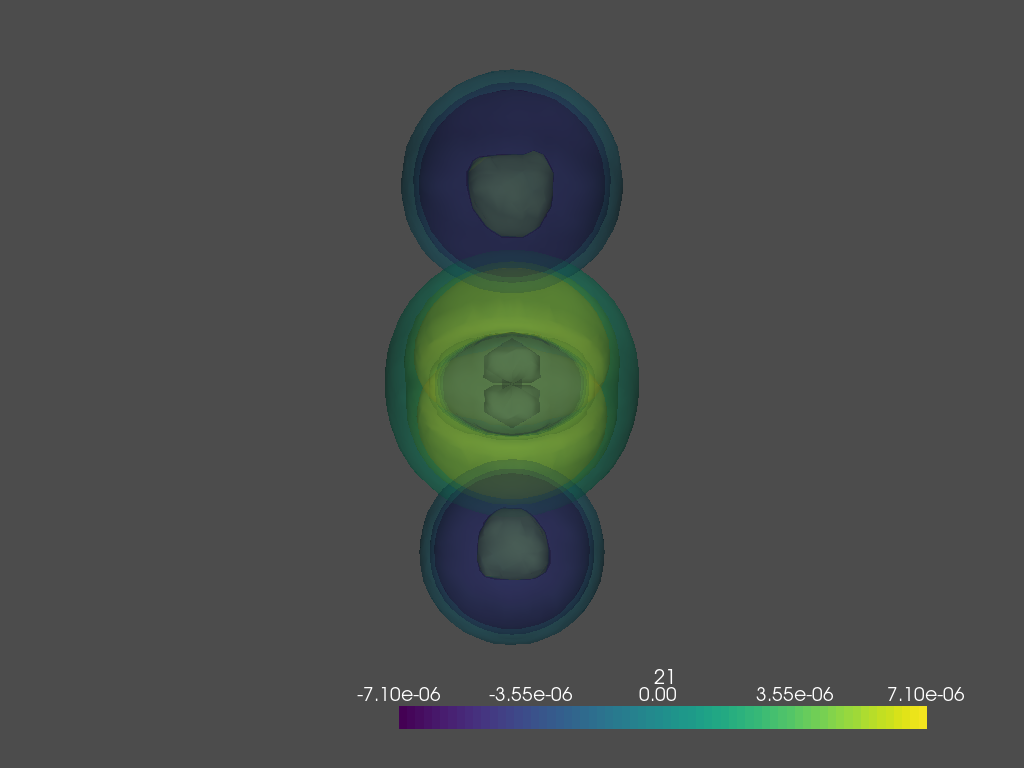

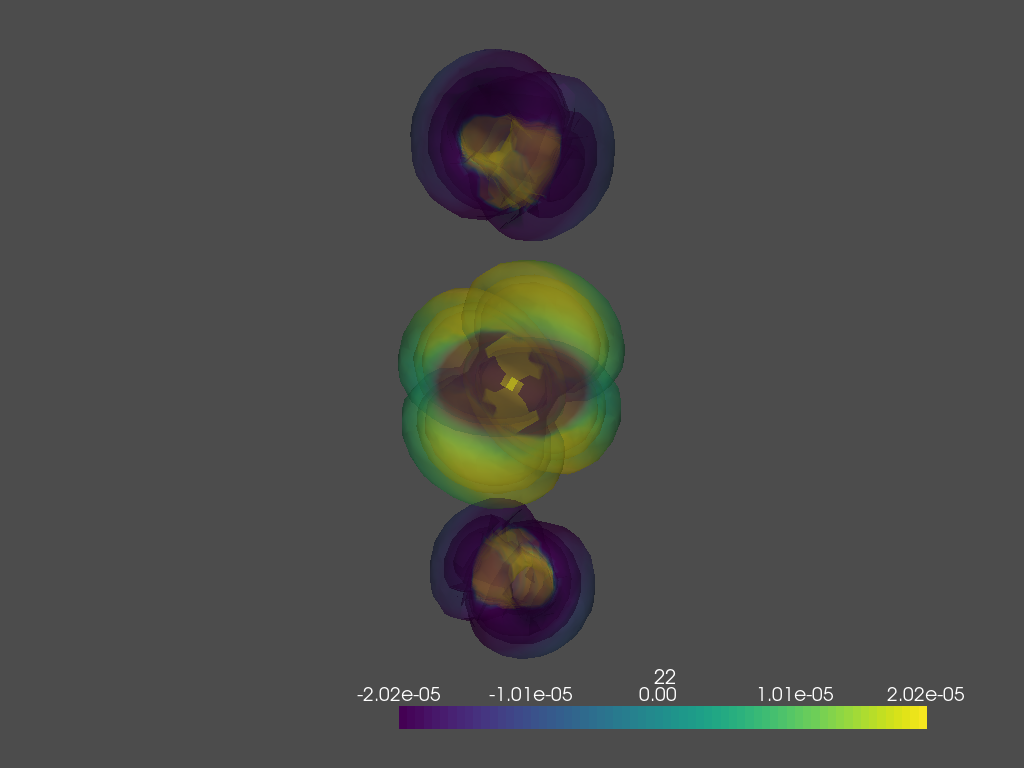

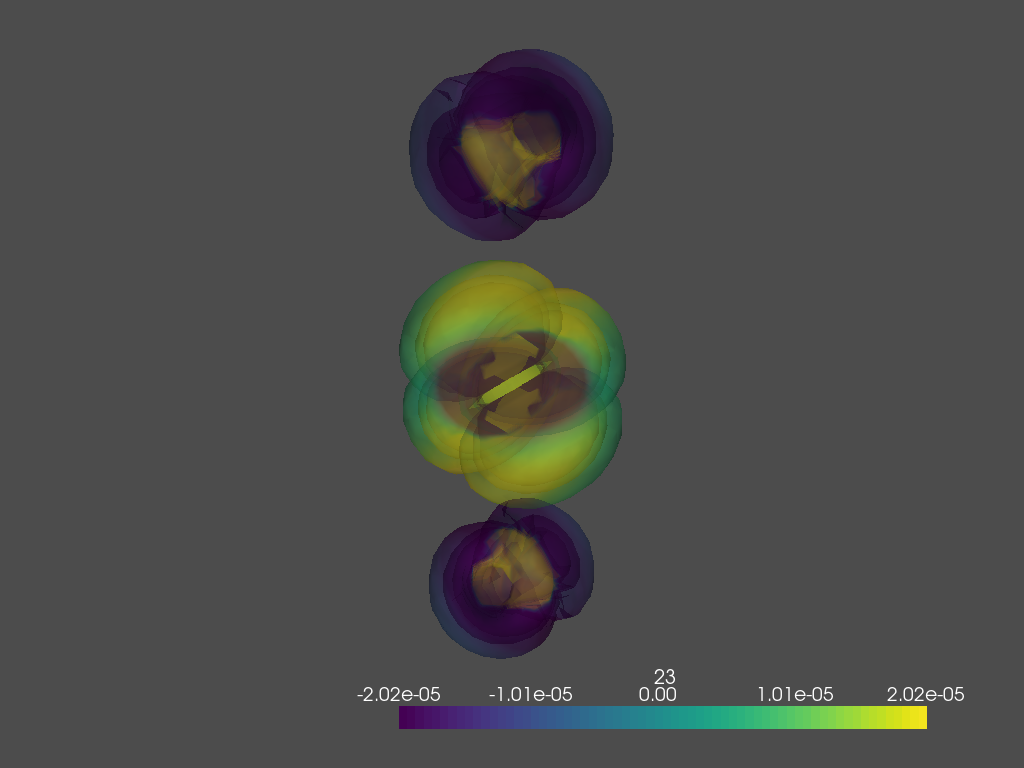

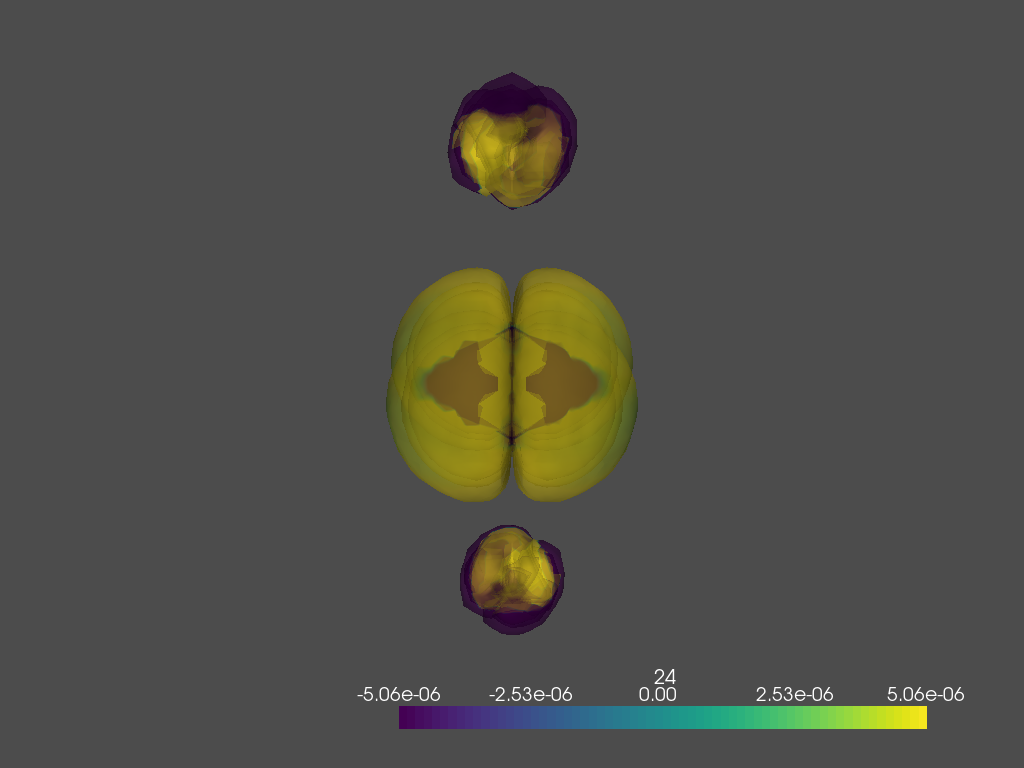

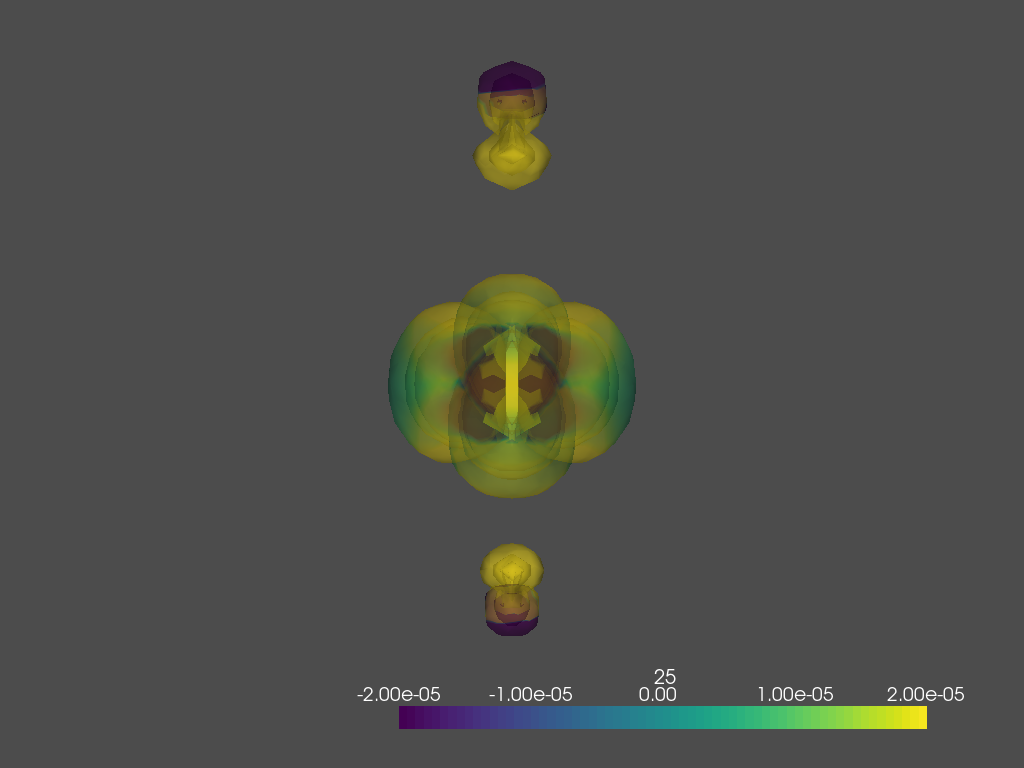

In [353]:
# Plot orbs as independent figures
[mo.plotOrb(orbN = [item], interactive = False, showAtoms = False) for item in orbList];

This shows orbitals 21 - 25, the full set of 4d components. Note that (22,23) and (24,25) are degenerate pairs, and are treated as one orbital (with occ = 4) in ePolyScat, as noted previously.

### Gauge results comparison

This shows a big change in absolute X-section between lenght (L) and velocity (V) gauge calculations (~order of magnitue), but the feature are appoximately the same in both cases (apologies for the poor plots here!).

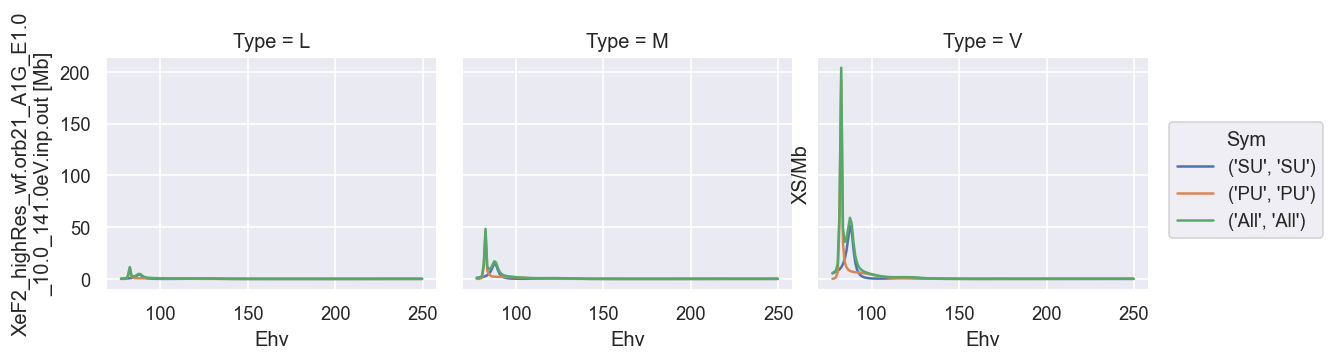

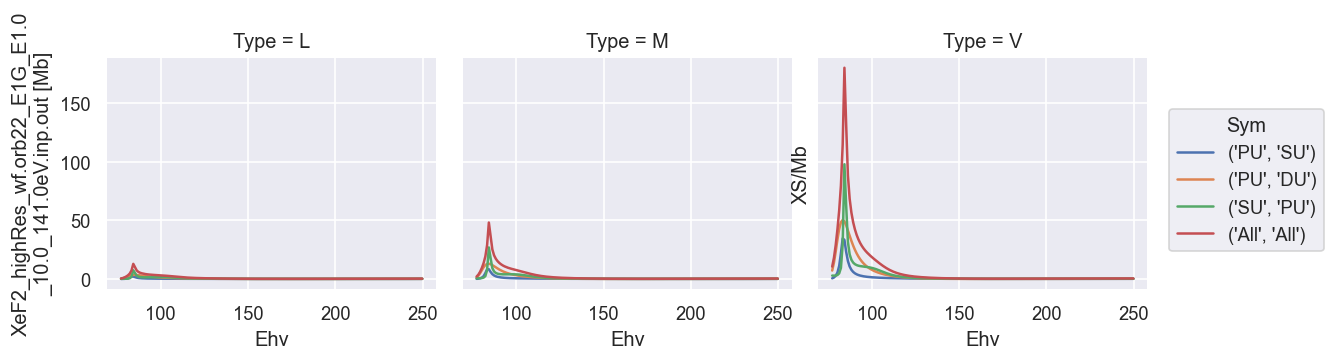

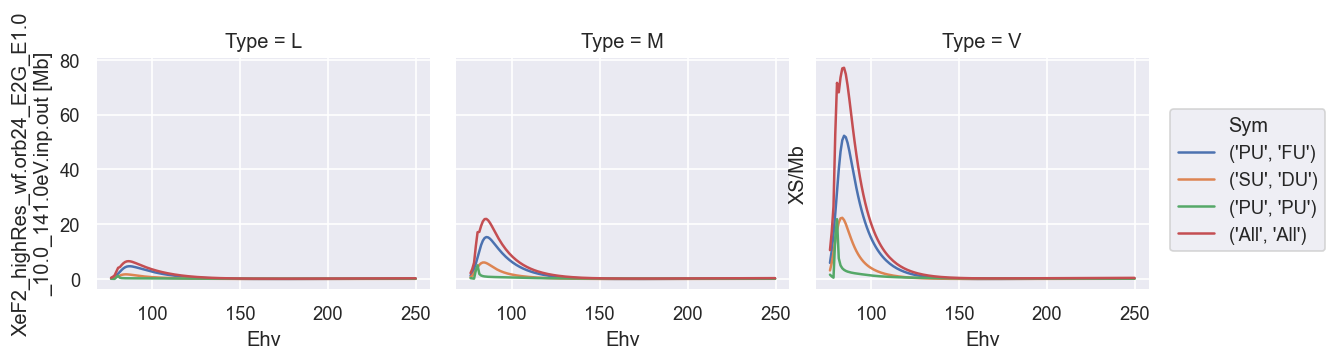

In [354]:
data.plotGetCro(pType='SIGMA', Etype=Etype, Erange=Erange)

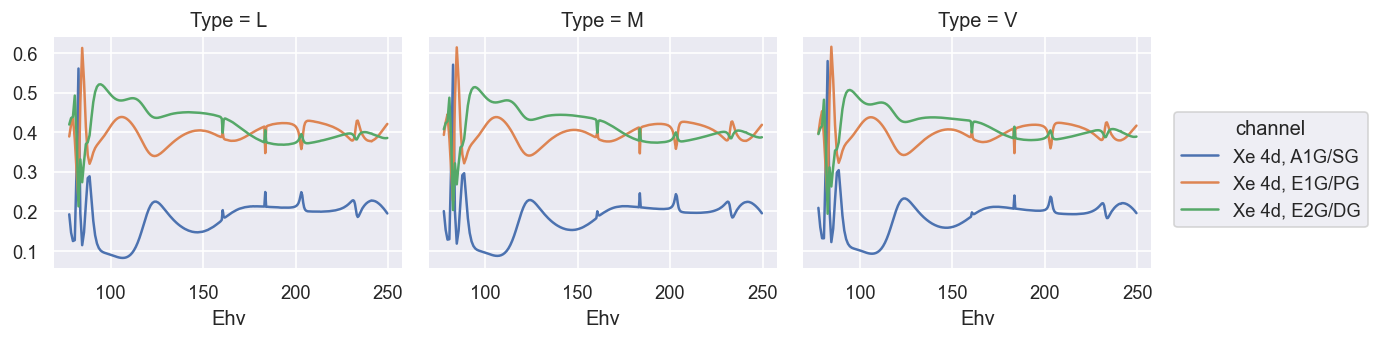

In [355]:
# Branching ratios
dsXS.swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}).plot.line(x='Ehv', col='Type');

Beta parameters are pretty much idendical for both gauges, with a broad, shape-resonance type feature at lower photon energies, and lots of small-scale resonance structure to higher photon energies.

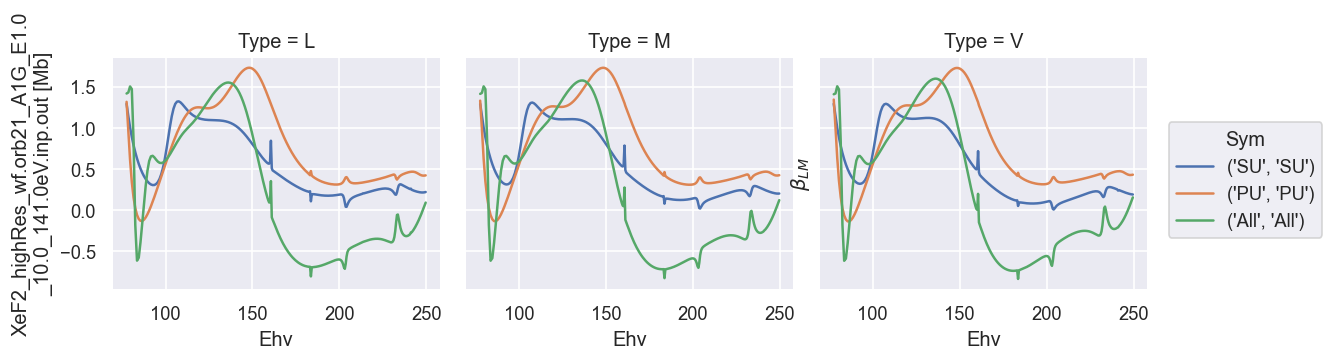

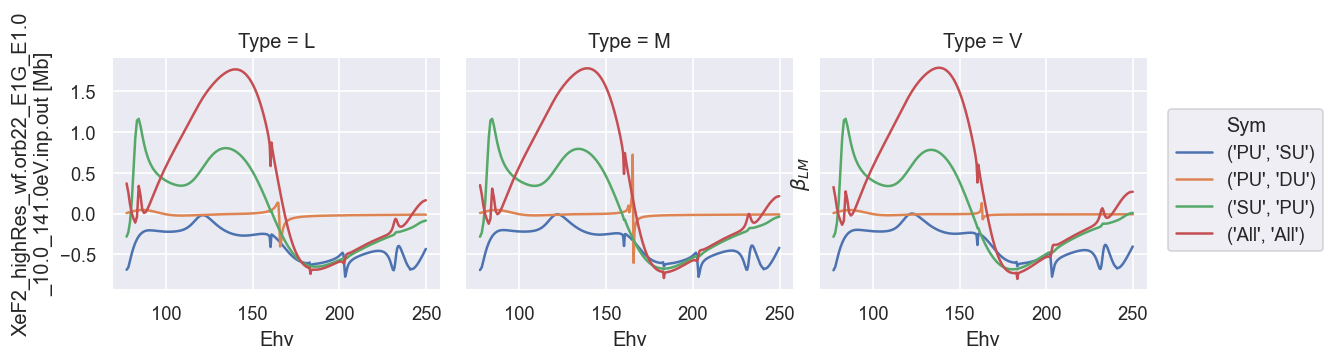

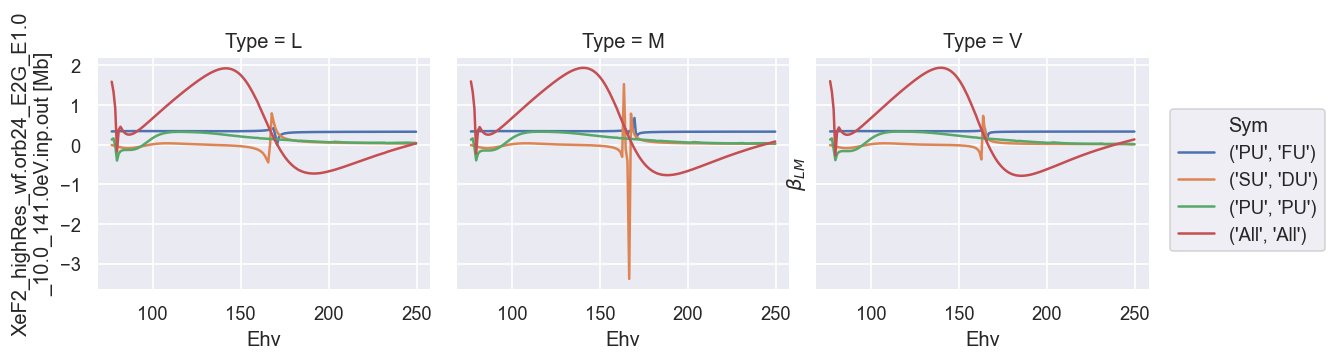

In [356]:
data.plotGetCro(pType='BETA', Etype=Etype, Erange=Erange)

### XS and $\beta$ per orbital & symmetry

Interactive^ plots per orbital & symmetry. In these plots the solid lines show the 'mixed' gauge results, and dashed lines show length and velocity gauges as bounds on the values.

^ Use controls in top right of plot. Also data sets can be turned on/off using the legend entries.

In [357]:
data.plotGetCro(pType='SIGMA', Etype = Etype, Erange = Erange, backend = 'hv')


*** Xe 4d, A1G/SG


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)


*** Xe 4d, E1G/PG


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)


*** Xe 4d, E2G/DG


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)

### Matrix elements

Plotting data XeF2_highRes_wf.orb21_A1G_E1.0_10.0_141.0eV.inp.out, pType=a, thres=0.1, with Seaborn
Plotting data XeF2_highRes_wf.orb22_E1G_E1.0_10.0_141.0eV.inp.out, pType=a, thres=0.1, with Seaborn
Plotting data XeF2_highRes_wf.orb24_E2G_E1.0_10.0_141.0eV.inp.out, pType=a, thres=0.1, with Seaborn


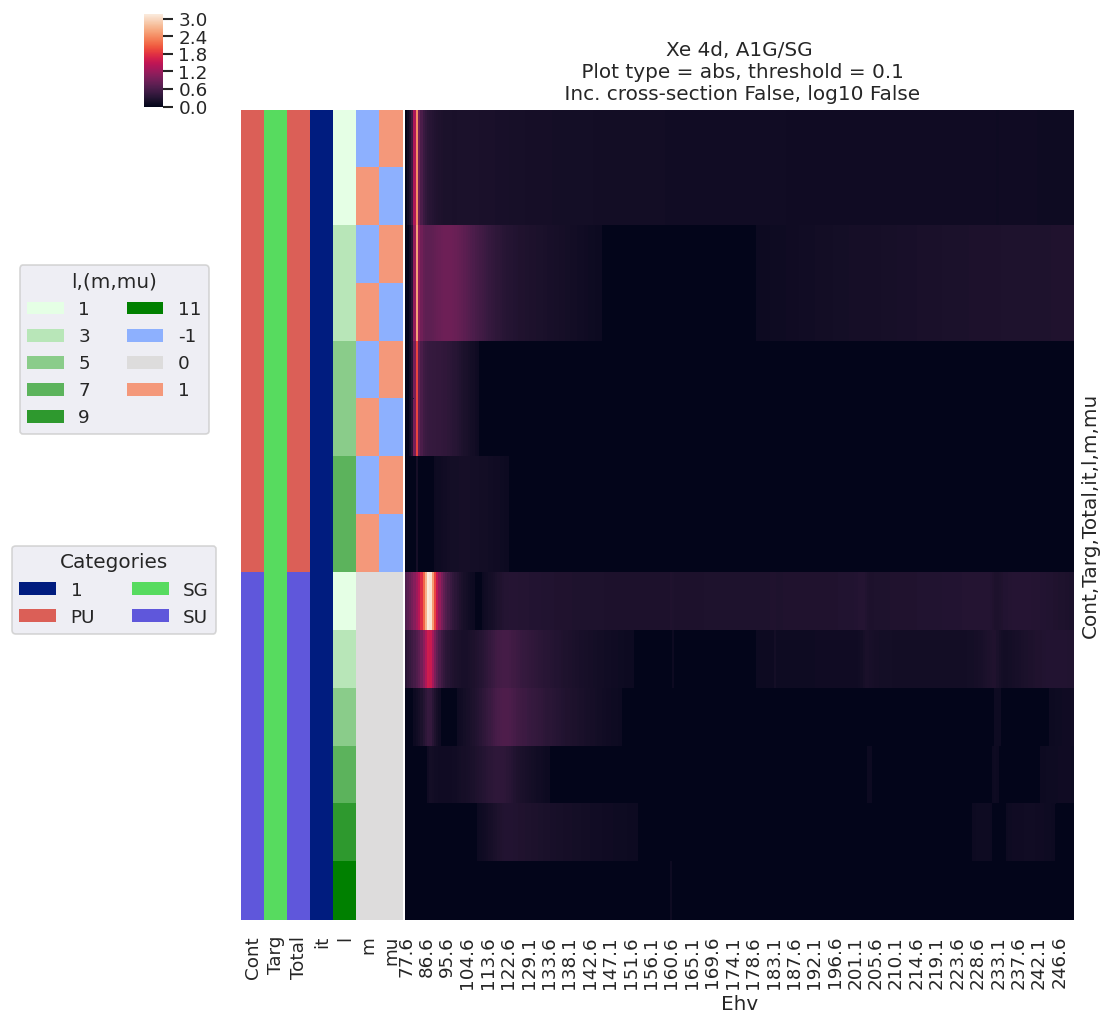

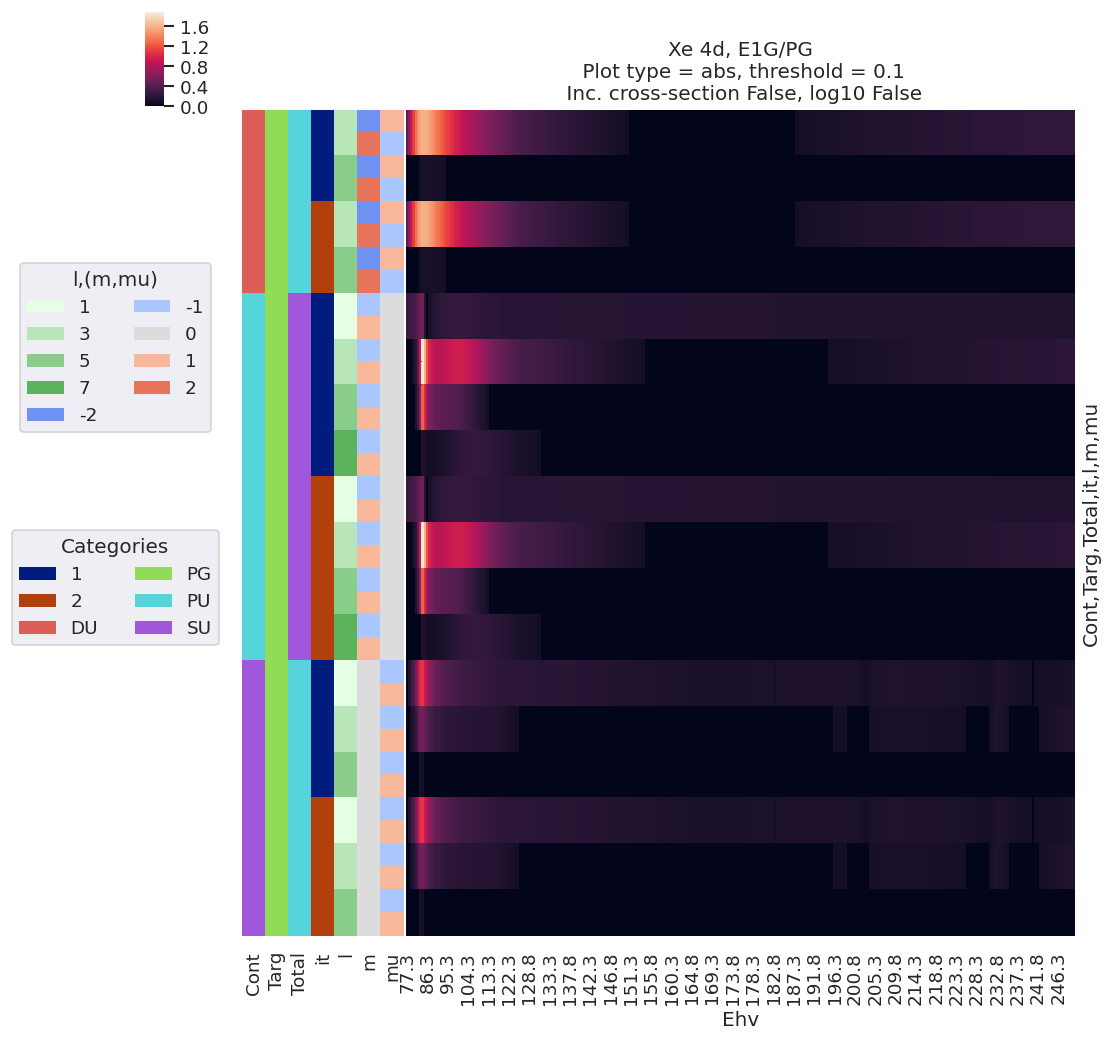

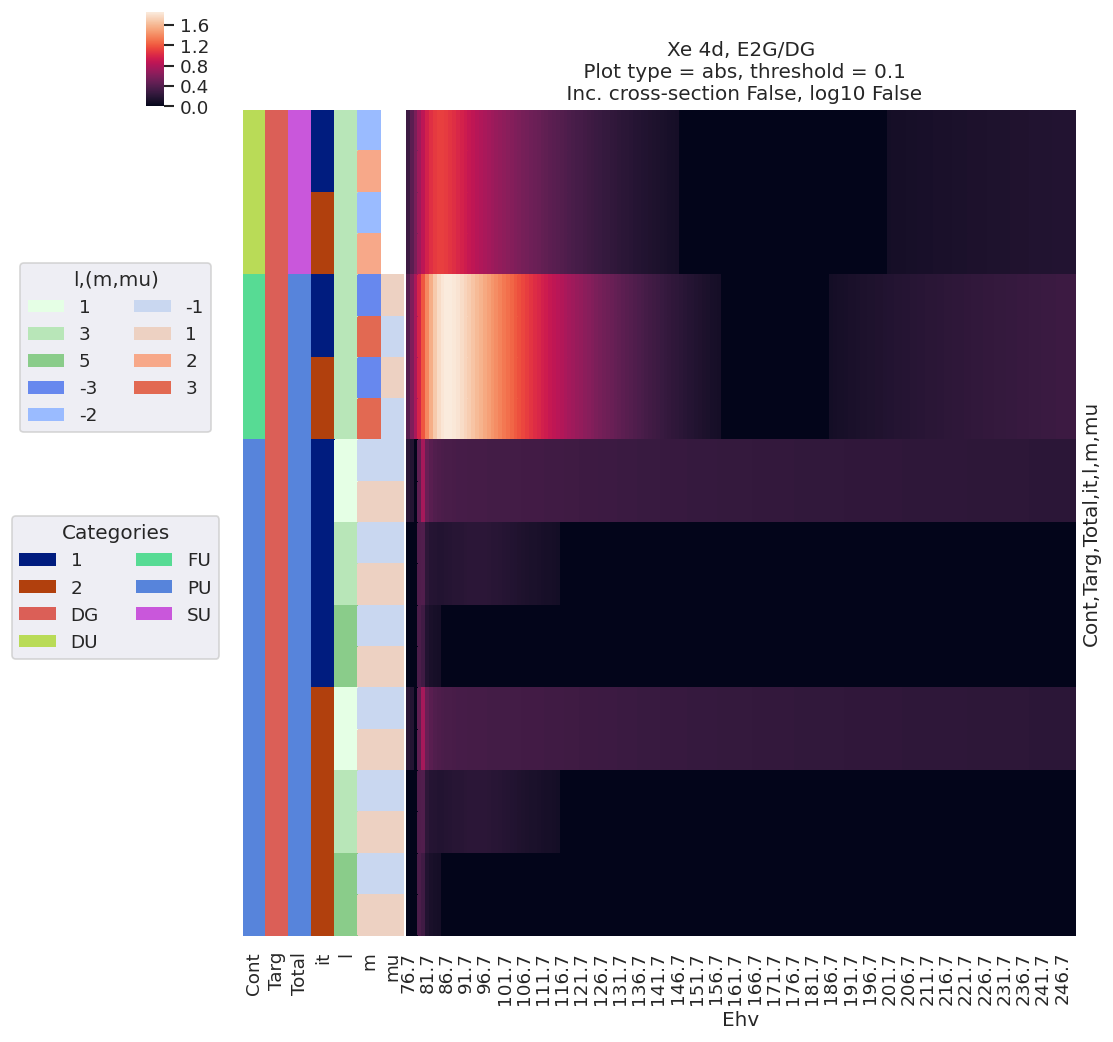

In [358]:
data.lmPlot(dataType = 'matE', Erange = Erange, Etype = Etype, thres = 0.1, logFlag = False, selDims = {'Type':'L'}, fillna = True)

## Versions

In [359]:
import scooby
scooby.Report(additional=['epsproc', 'xarray', 'jupyter'])

--------------------------------------------------------------------------------
  Date: Wed Nov 11 18:06:14 2020 Eastern Standard Time

                OS : Windows
            CPU(s) : 32
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

           epsproc : 1.3.0-dev
            xarray : 0.15.0
           jupyter : Version unknown
             numpy : 1.19.2
             scipy : 1.3.0
           IPython : 7.12.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191125 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------